<a href="https://colab.research.google.com/github/HGF-AA/Python/blob/main/Graphing_And_Correcting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Basic Setup, Importing Data
from google.colab import files
from google.colab import drive

import pandas as pd
import io

drive.mount ('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/googleplaystore.csv')
df.head()


Mounted at /content/drive


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.shape

(10841, 13)

In [ ]:
#Getting the first parts Wrapped Up
df.columns
df.columns = df.columns.str.replace(" ","_")
df.shape
df.dtypes
df.isnull().sum()


,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content_Rating,1
Genres,0


<Axes: >

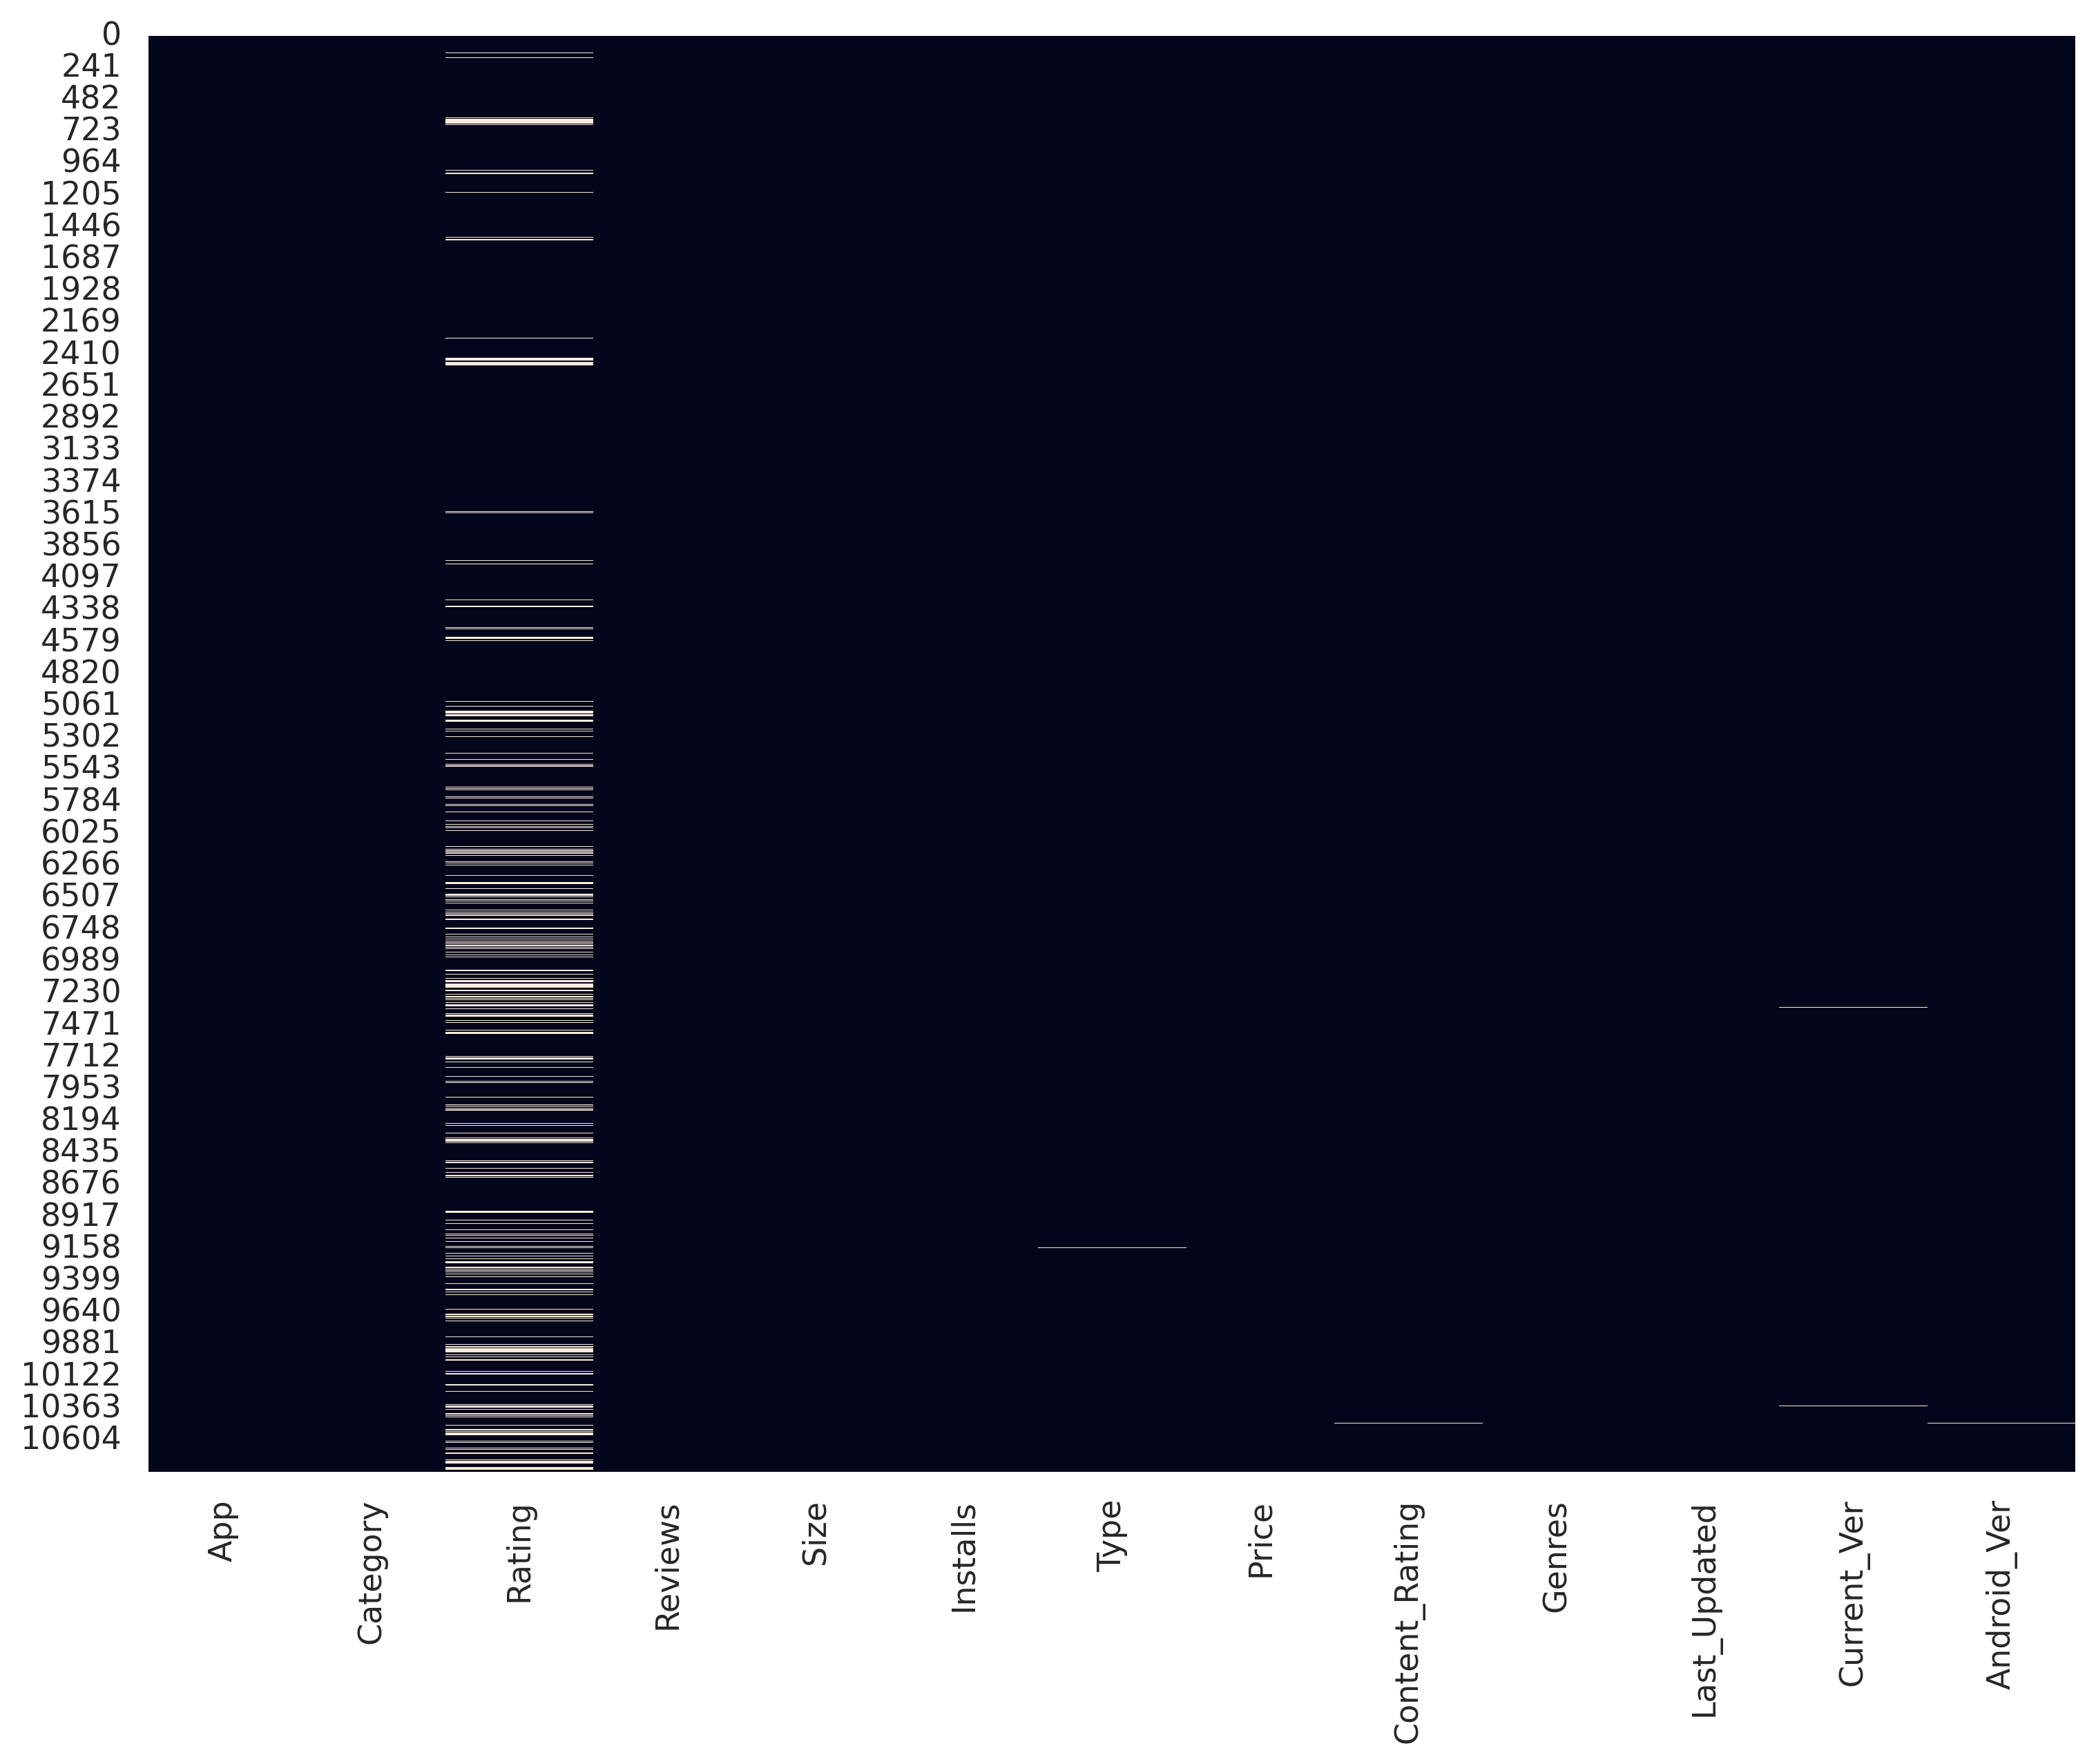

In [ ]:
#Start to Plot Things, Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
# Let's set the theme of plots.
sns.set_theme()
sns.set(rc={"figure.dpi":300, "figure.figsize":(12,9)})
sns.heatmap(df.isnull(), cbar=False)



In [ ]:
rating_median = df["Rating"].median()
print(rating_median)
df["Rating"].fillna(rating_median, inplace=True)
df.dropna(inplace=True)
df.isnull().sum().sum()
df.info()


4.3
<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content_Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last_Updated    10829 non-null  object 
 11  Current_Ver     10829 non-null  object 
 12  Android_Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


<ipython-input-5-db072b2f56cf>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Rating"].fillna(rating_median, inplace=True)


In [ ]:
df["Reviews"].describe()
df["Reviews"] = df["Reviews"].astype("int64")
df["Reviews"].describe().round()
print(len(df["Size"].unique()))
df["Size"].unique()
df["Size"].replace("M","", regex=True, inplace = True)
df["Size"].replace("k","", regex=True, inplace = True)
df["Size"].unique()

457


<ipython-input-6-263a8a4f9bdc>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Size"].replace("M","", regex=True, inplace = True)
<ipython-input-6-263a8a4f9bdc>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '5.5', '17', '39', '31', '4.2', '7.0',
       '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '201', '3.6', '5.7', '8.6', '2.4', '27',
       '2.7', '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4',
       '18', '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6',
       '7.1', '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9',
       '9.5', '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2',
       '2.1', '42', '7.3', '9.1', '55', '6.5', '1.5', '7.5', '51', '41',
       '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8', '8.8',
       '6.6', '5.1', '61', '66', '79', '8.4', '118', '44', '695', '1.6',
       '6.2', '53', '1.4', '3.0', '5.8', '3.8', '9.6', '45', '63', '49',
       '77', '4.4', '4.8', '70', '6.9', '9.3', '10.0', '8.1', '36',

In [ ]:
size_median = df[df["Size"]!="Varies with device"]["Size"].astype(float).median()
size_median


15.0

In [ ]:
df["Size"].replace("Varies with device", size_median, inplace=True)
df.Size = pd.to_numeric(df.Size)
df.Size.head()
df.Size.describe().round()


<ipython-input-8-e974fdbf5b52>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Size"].replace("Varies with device", size_median, inplace=True)


,Size
count,10829.0
mean,34.0
std,91.0
min,1.0
25%,7.0
50%,15.0
75%,28.0
max,1020.0


In [ ]:
df["Installs"].unique()
df.Installs = df.Installs.apply(lambda x:x.replace("+",""))
df.Installs = df.Installs.apply(lambda x:x.replace(",",""))
df.Installs = df.Installs.apply(lambda x:int(x))
df["Installs"].unique()


df["Price"].unique()
df.Price = df.Price.apply(lambda x:x.replace("$",""))
df.Price = df.Price.apply(lambda x:float(x))
df["Price"].unique()


array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [ ]:
len(df["Genres"].unique())
df["Genres"].head(10)
df["Genres"] = df["Genres"].str.split(";").str[0]
len(df["Genres"].unique())
df["Genres"].unique()
df["Genres"].replace("Music & Audio", "Music", inplace =True)

df["Genres"].value_counts()



<ipython-input-10-8ff32e69a528>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Genres"].replace("Music & Audio", "Music", inplace =True)


,count
Genres,
Tools,841
Entertainment,666
Education,644
Medical,463
Business,460
Productivity,424
Sports,402
Personalization,390
Communication,388


In [ ]:
df["Last_Updated"].head()


,Last_Updated
0,"January 7, 2018"
1,"January 15, 2018"
2,"August 1, 2018"
3,"June 8, 2018"
4,"June 20, 2018"


In [ ]:
df["Last_Updated"] = pd.to_datetime(df["Last_Updated"])


In [ ]:
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4 and up


Text(0.5, 1.0, 'Free & Paid')

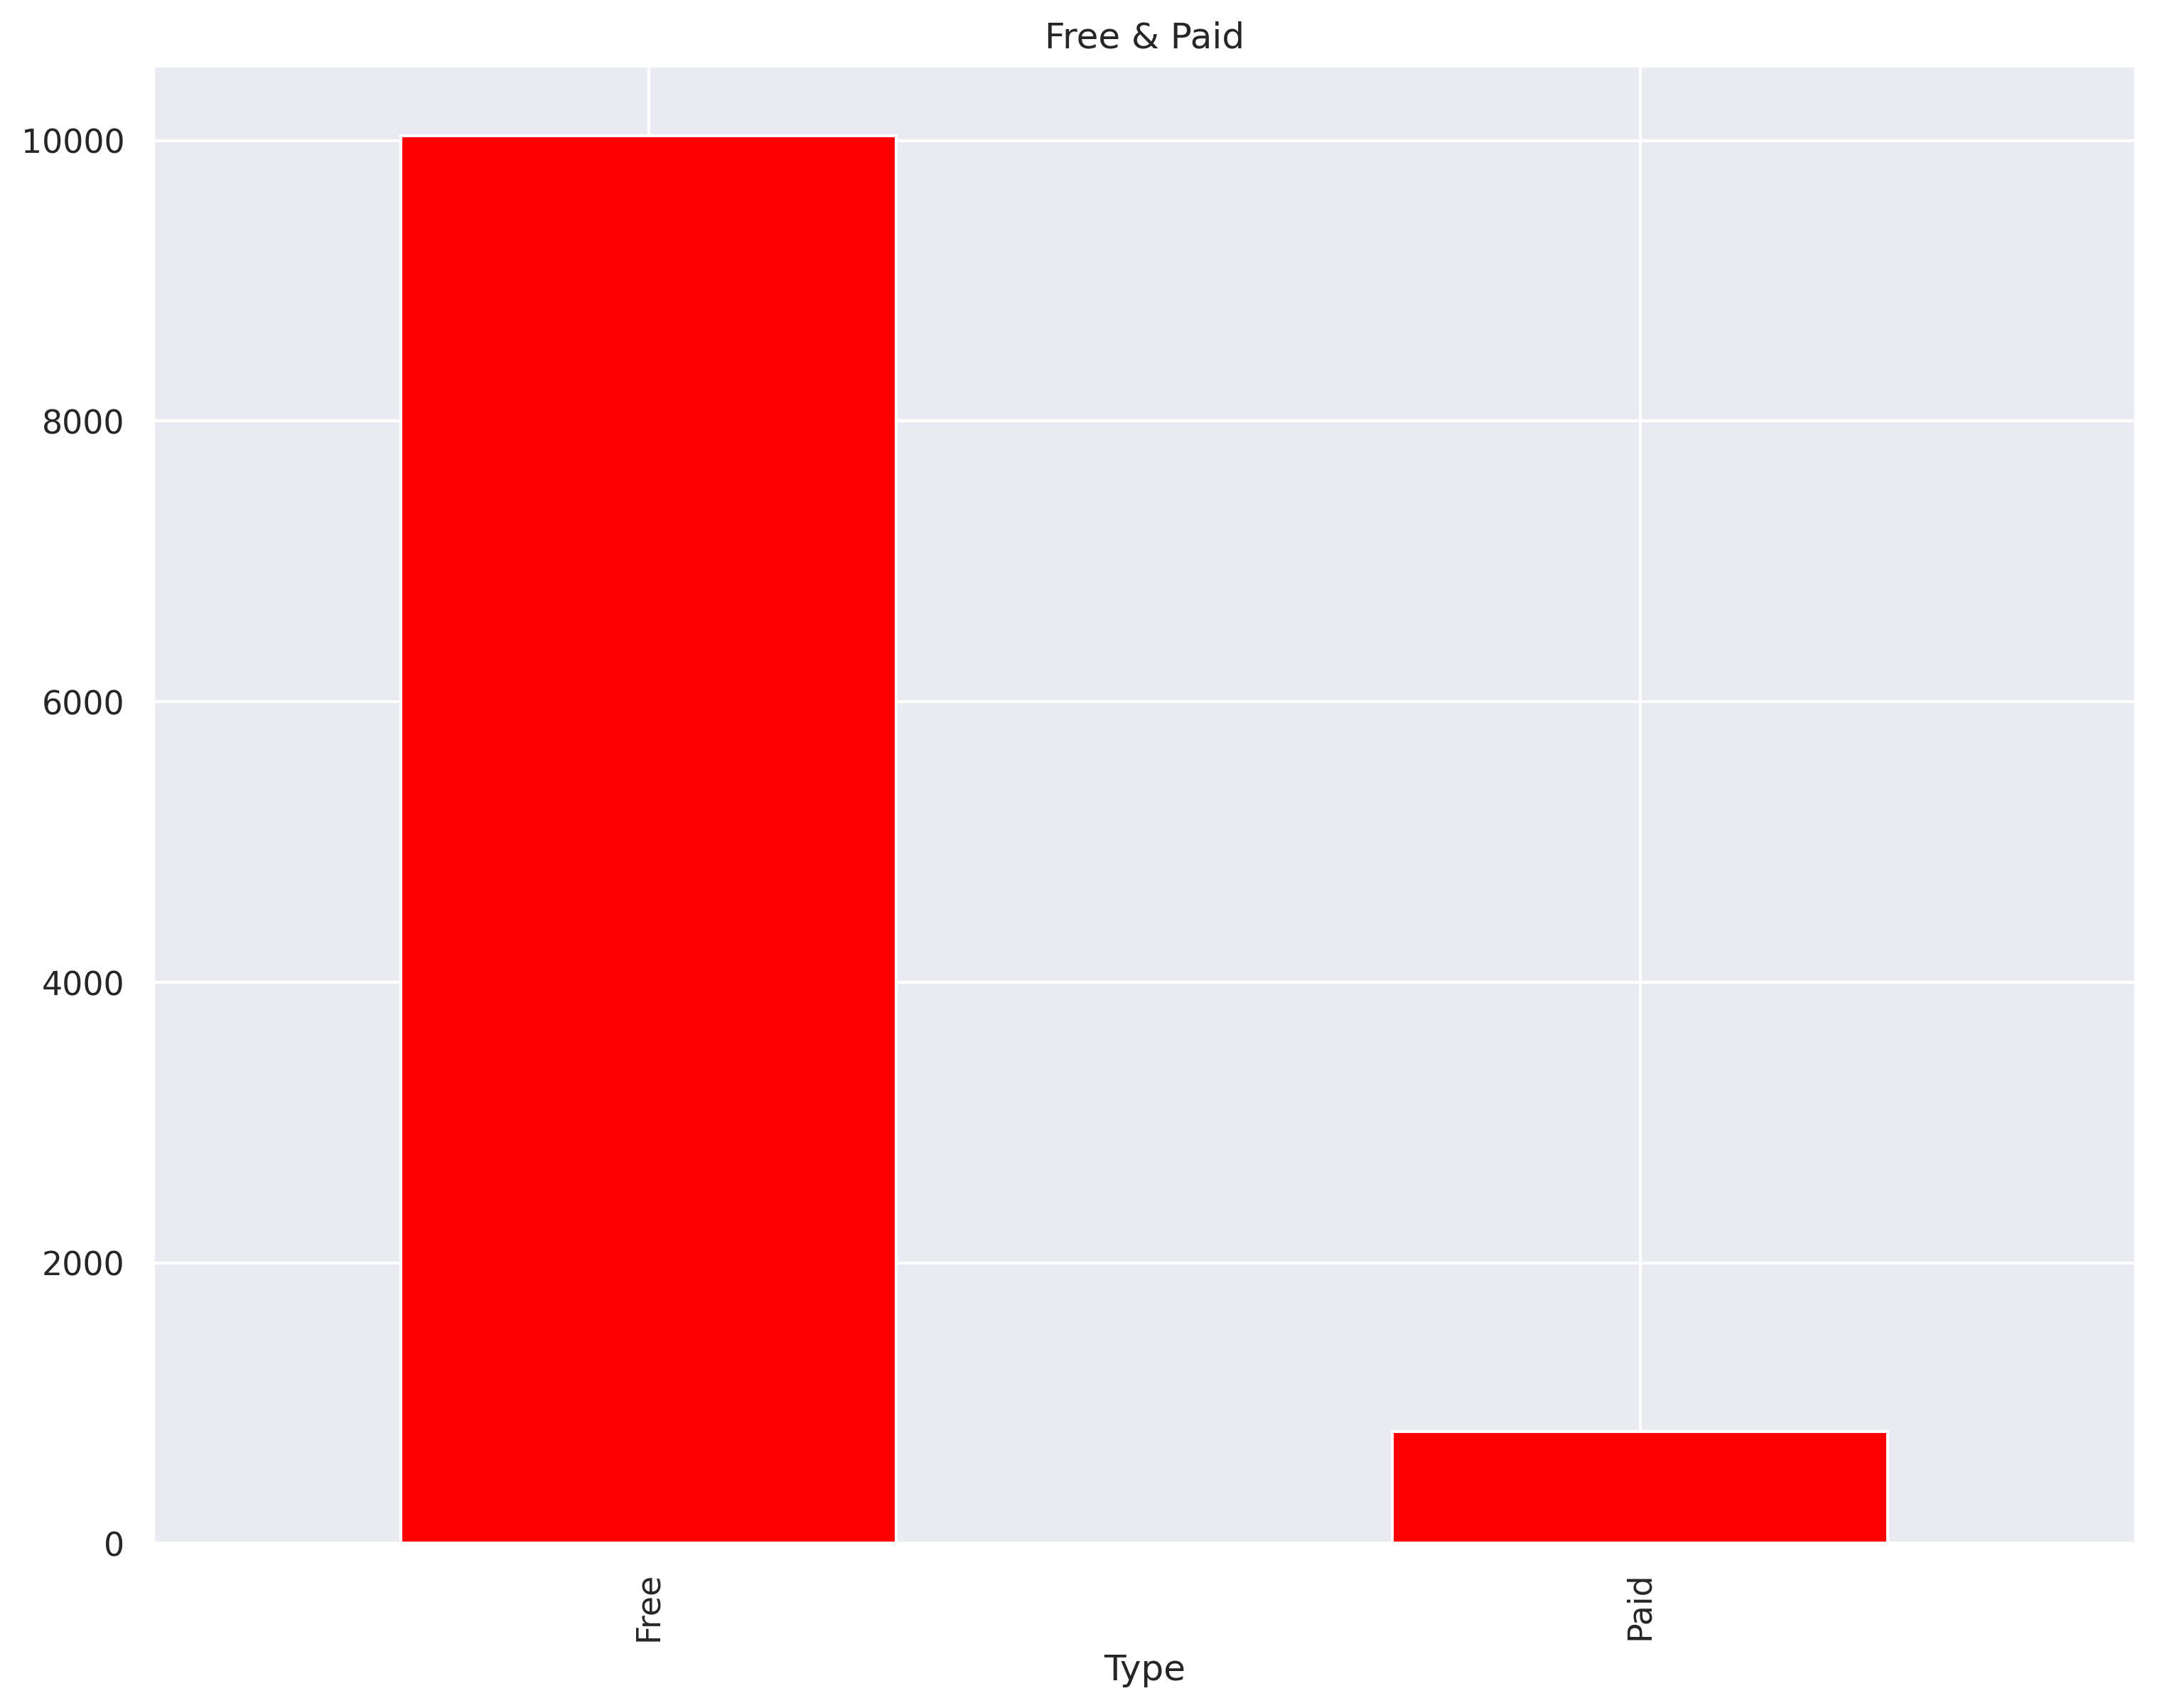

In [ ]:
#Graphing

df["Type"].value_counts().plot(kind="bar", color ="red")
plt.title("Free & Paid")


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Content rating with their counts')

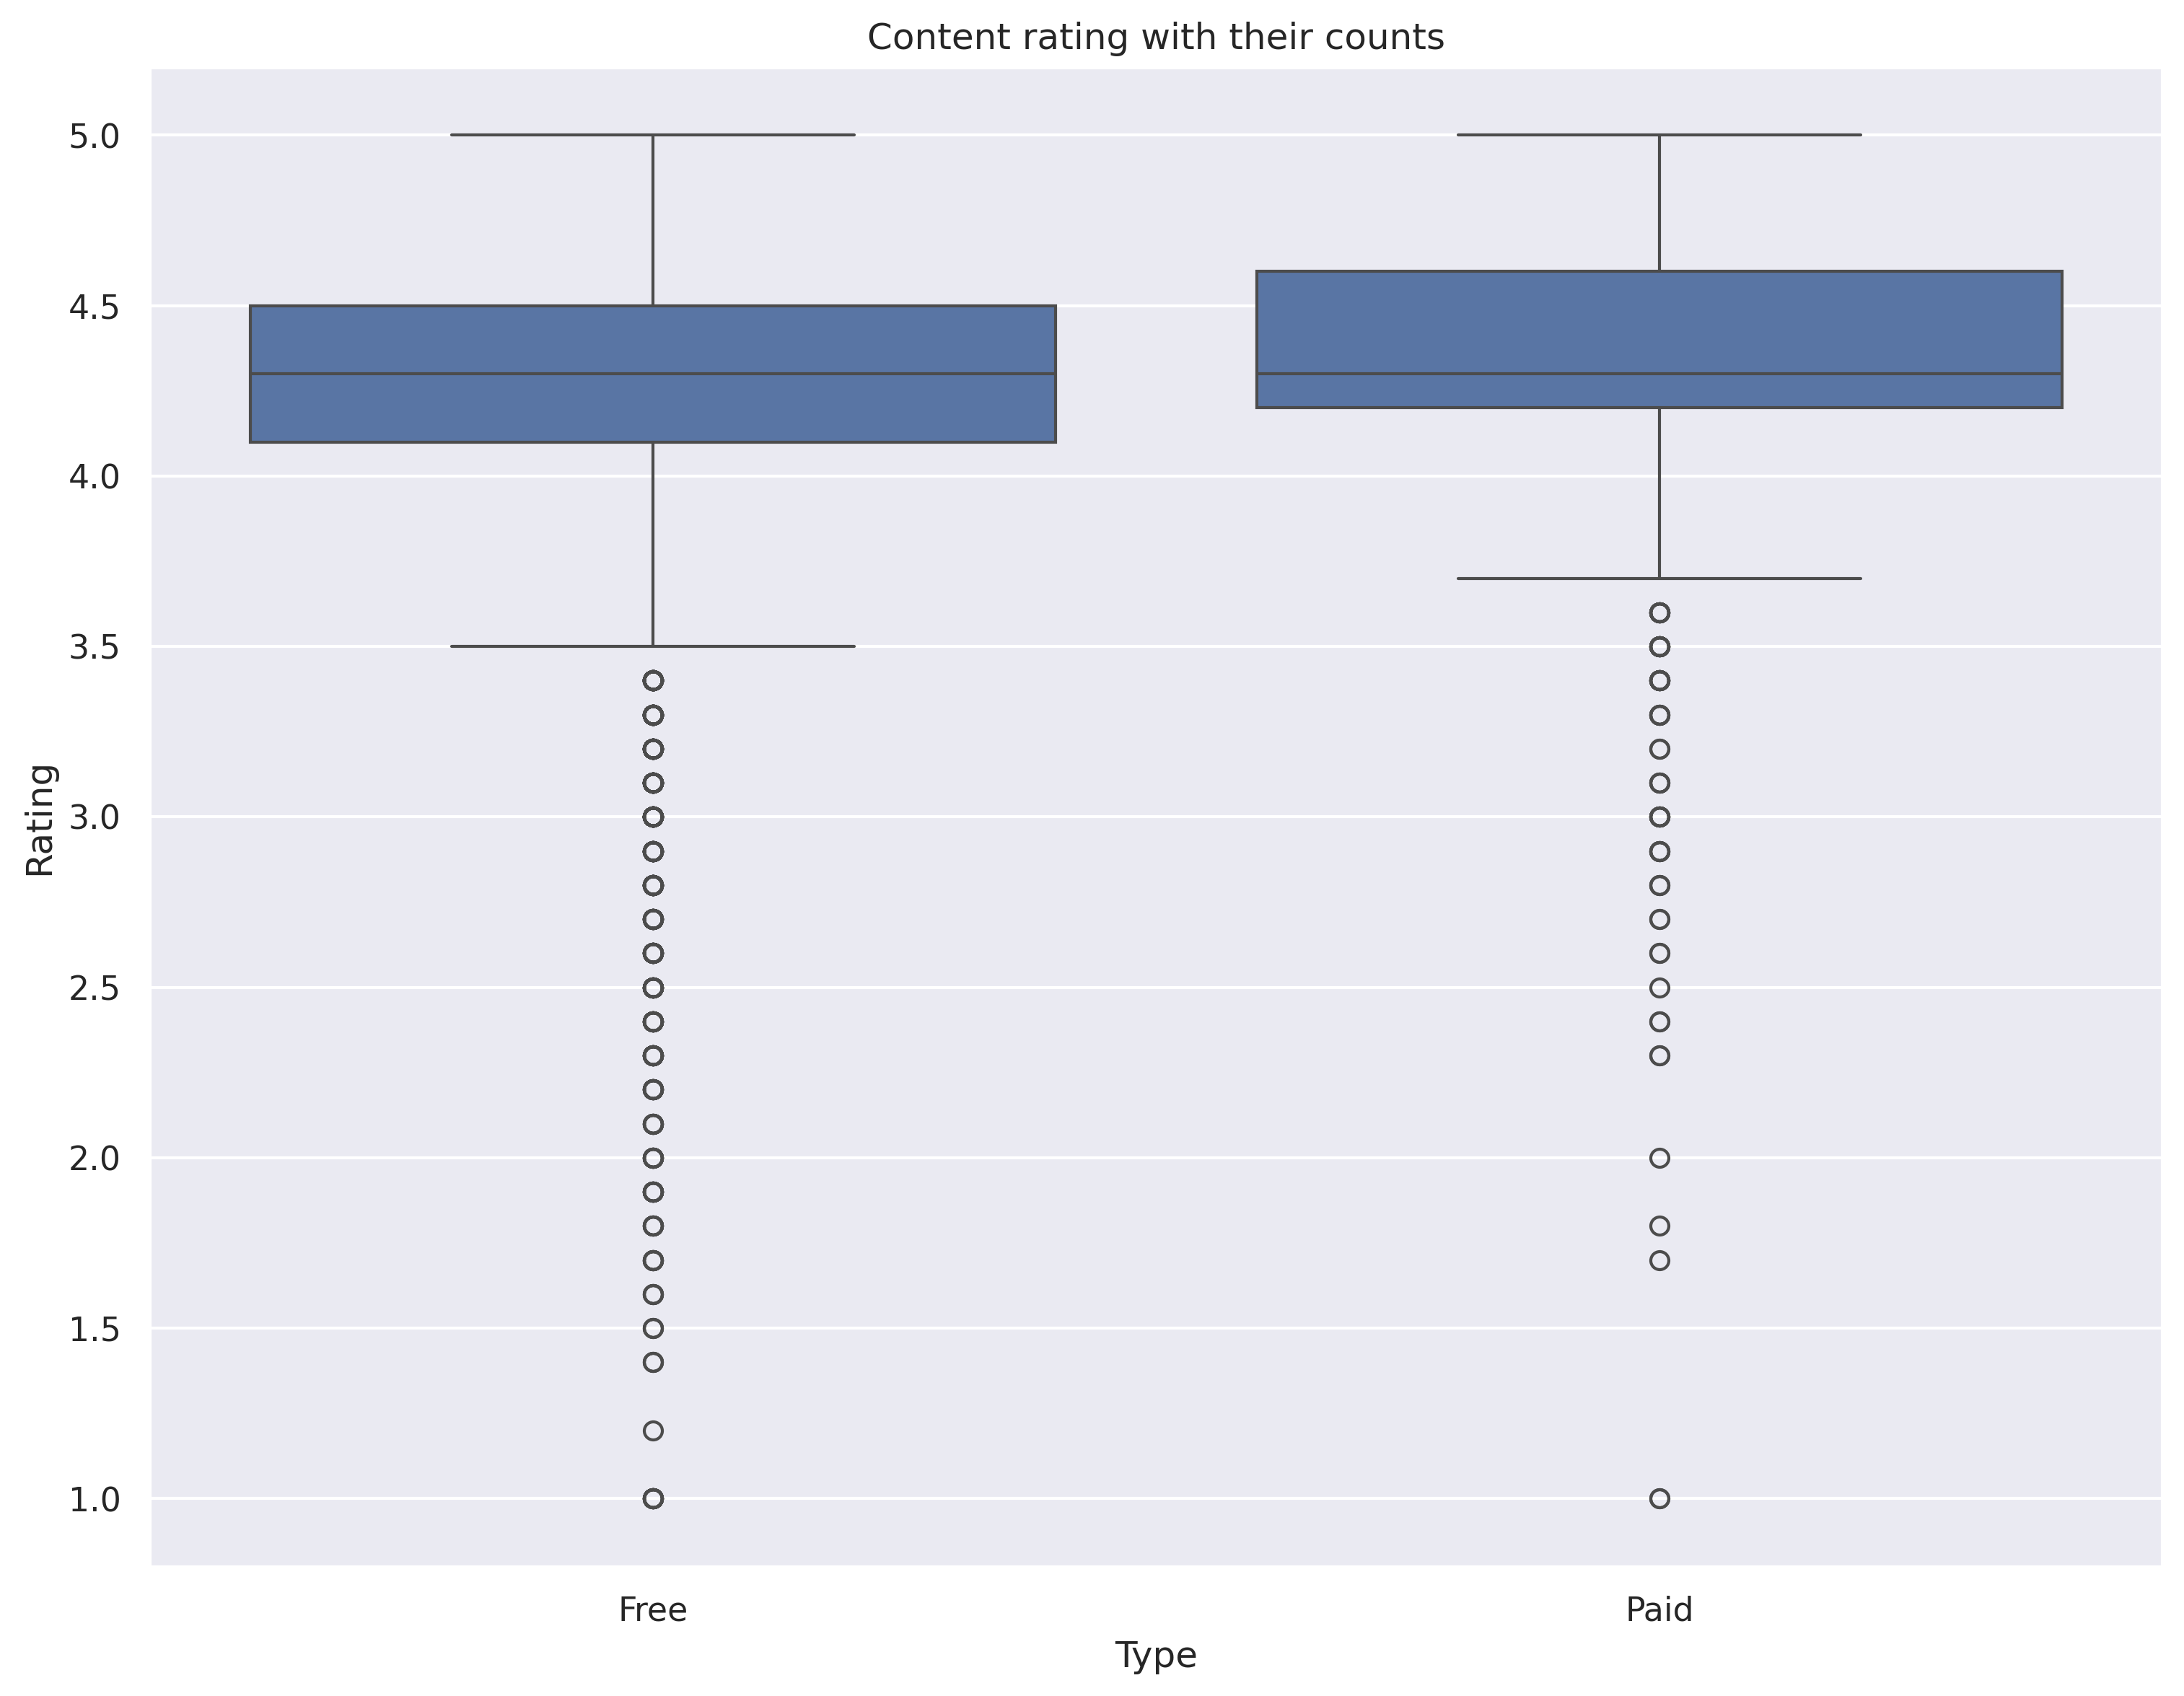

In [ ]:
sns.boxplot(x = "Type", y = "Rating", data = df)
plt.title("Content rating with their counts")

Text(0.5, 1.0, 'Content rating with their counts')

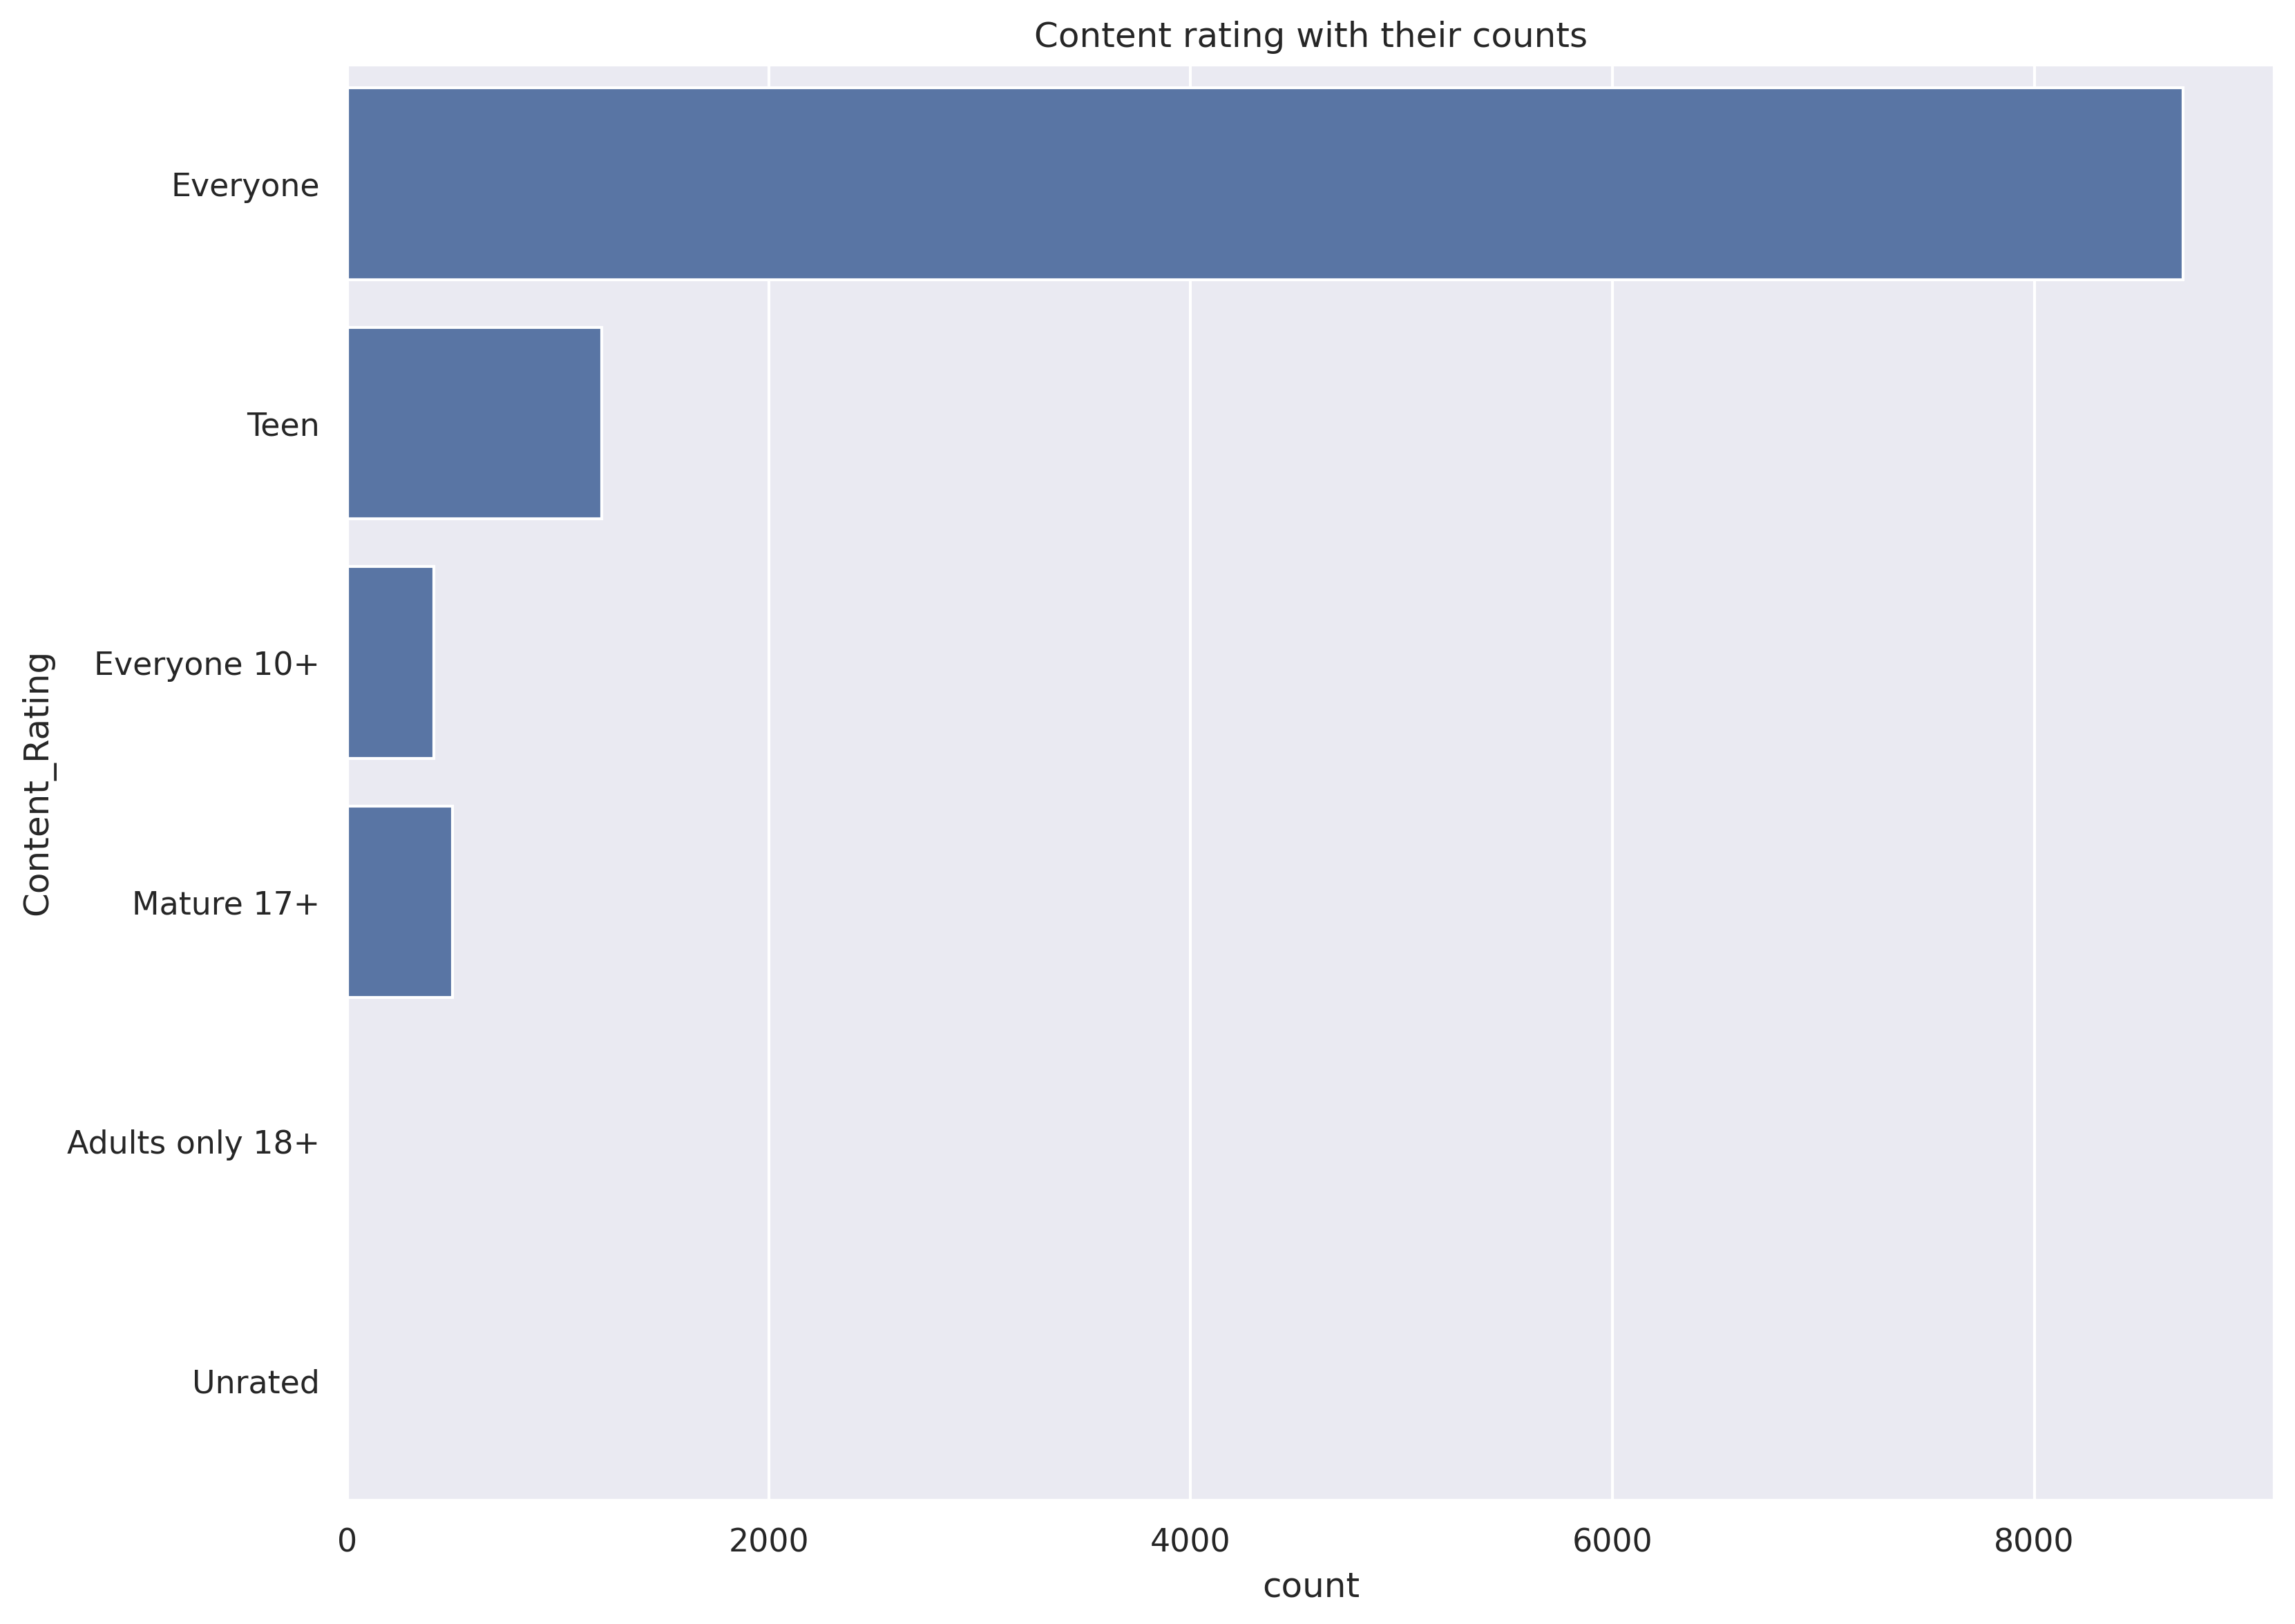

In [ ]:
sns.countplot(y = "Content_Rating", data = df)
plt.title("Content rating with their counts")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'The content rating & rating')

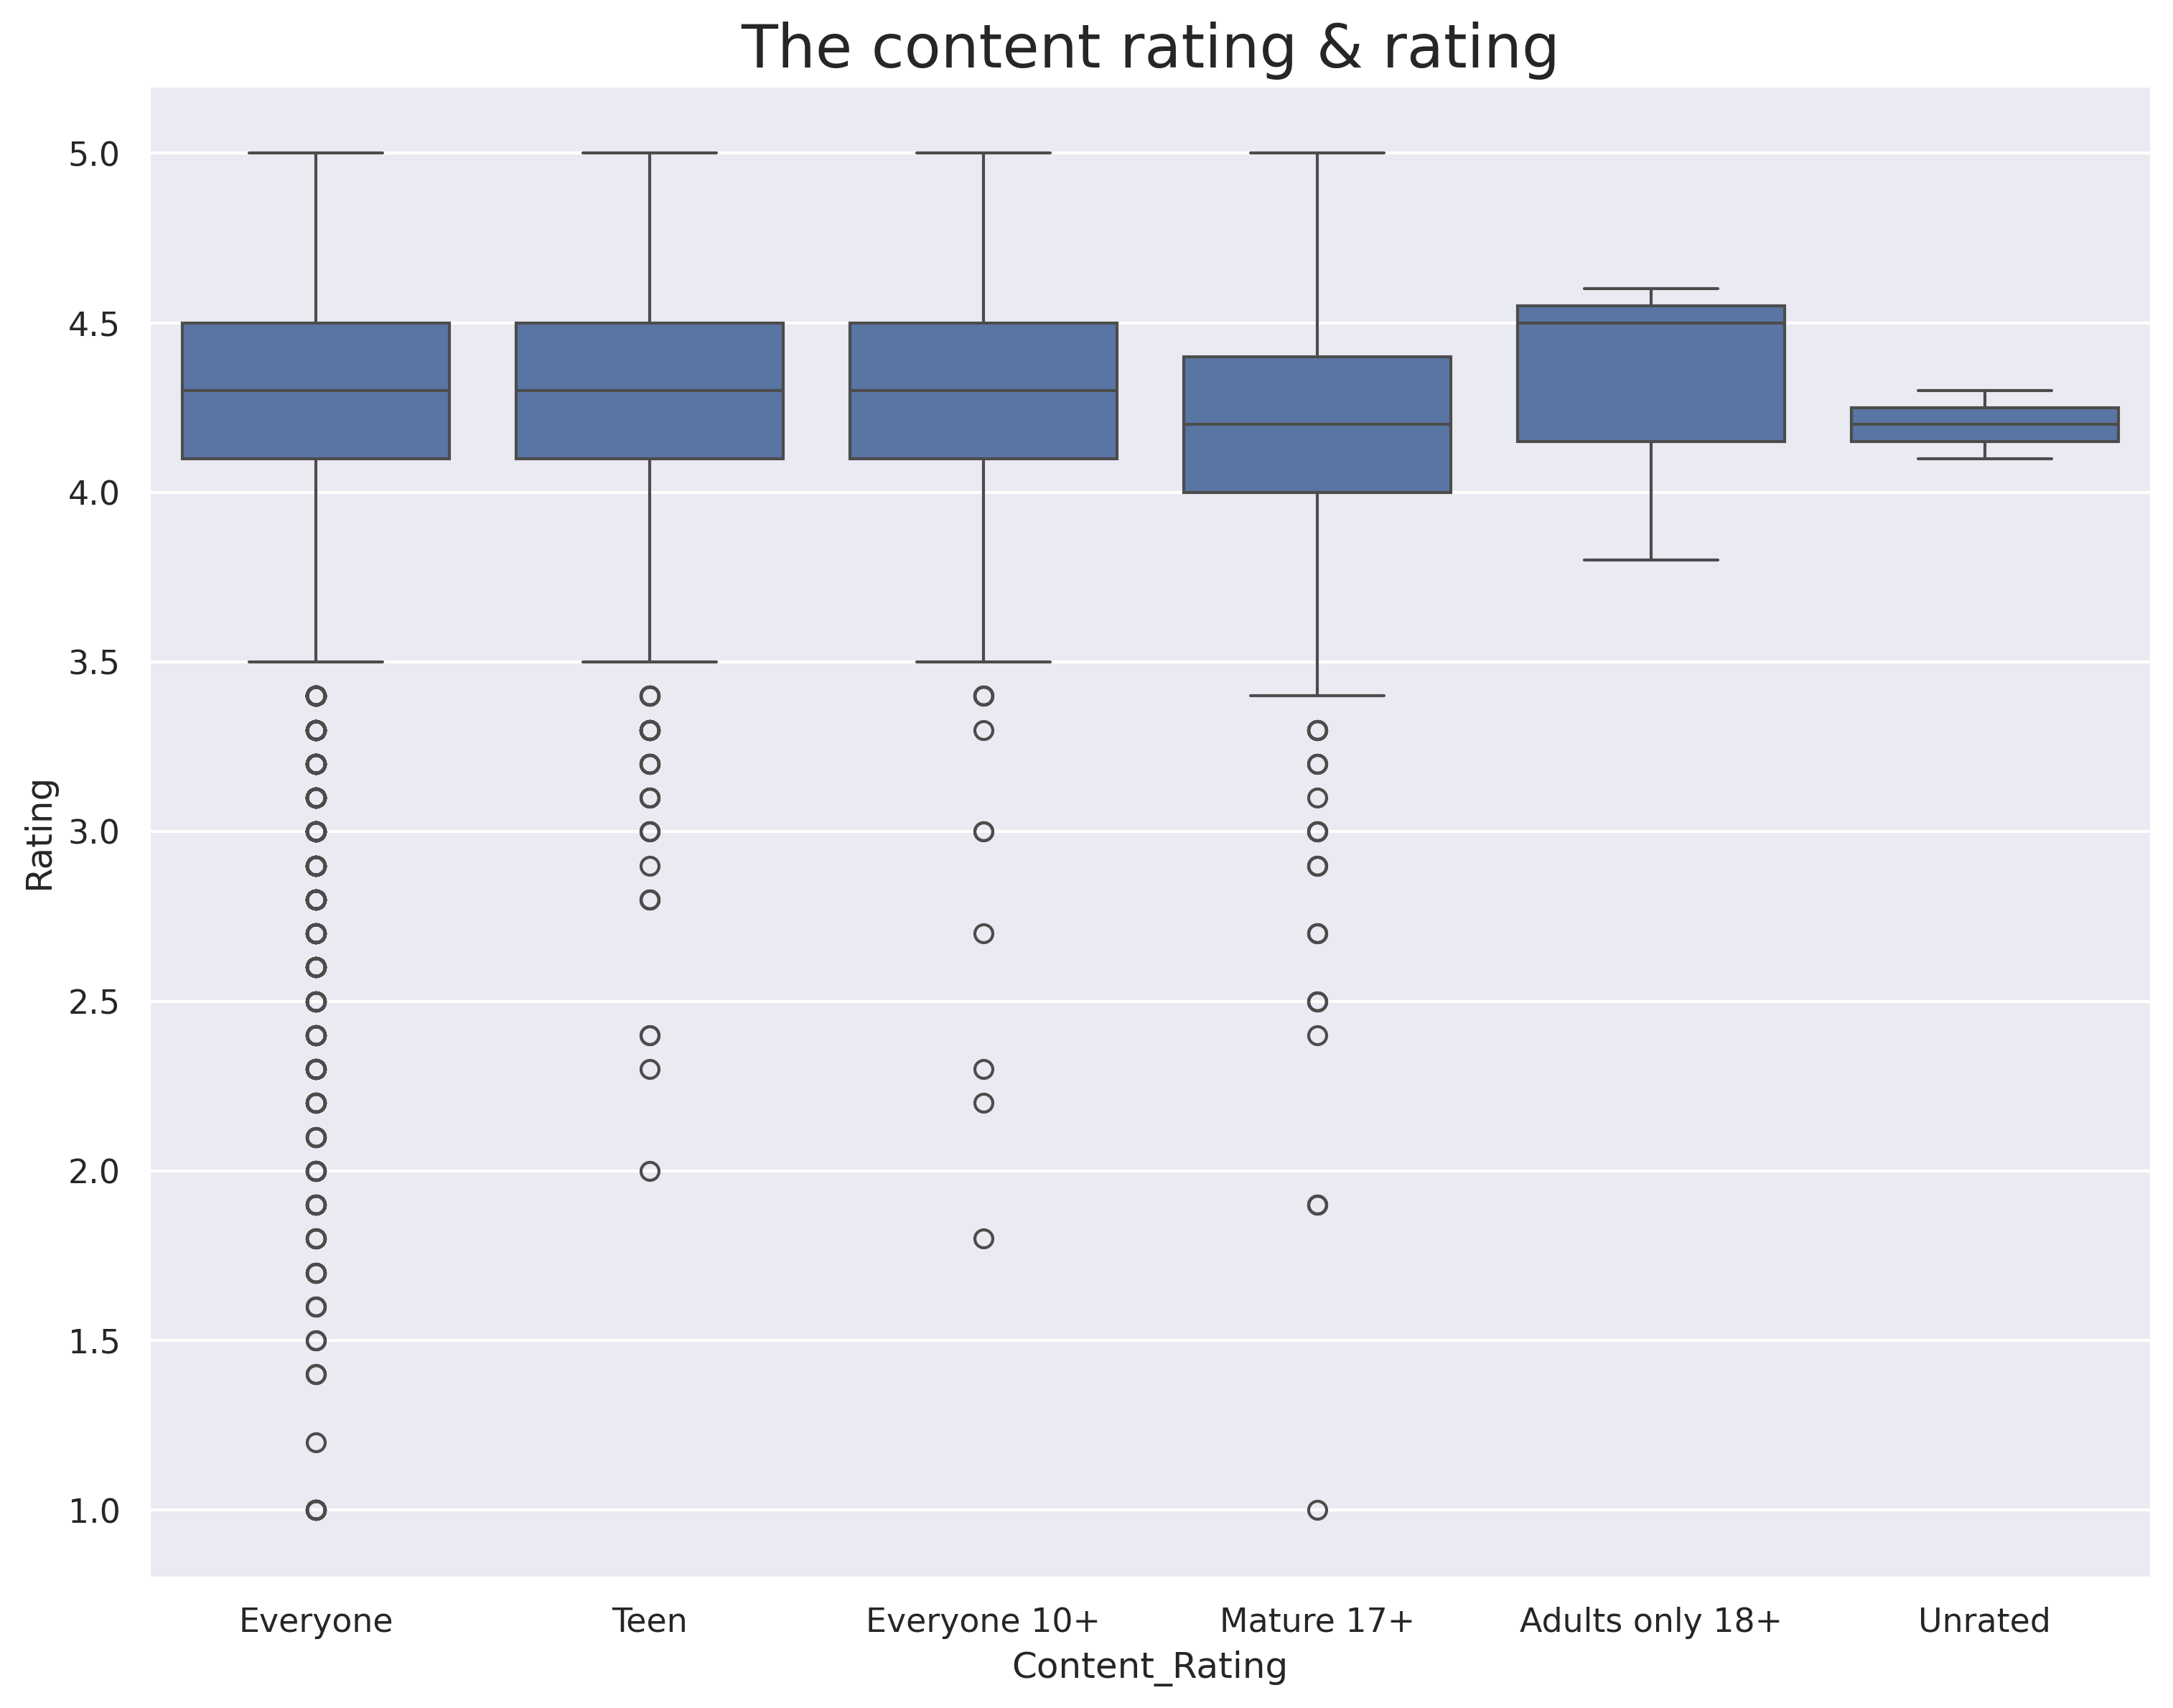

In [ ]:
sns.boxplot(x = "Content_Rating", y = "Rating", data = df)
plt.title("The content rating & rating", size=20)

Text(0.5, 1.0, 'The number of categories')

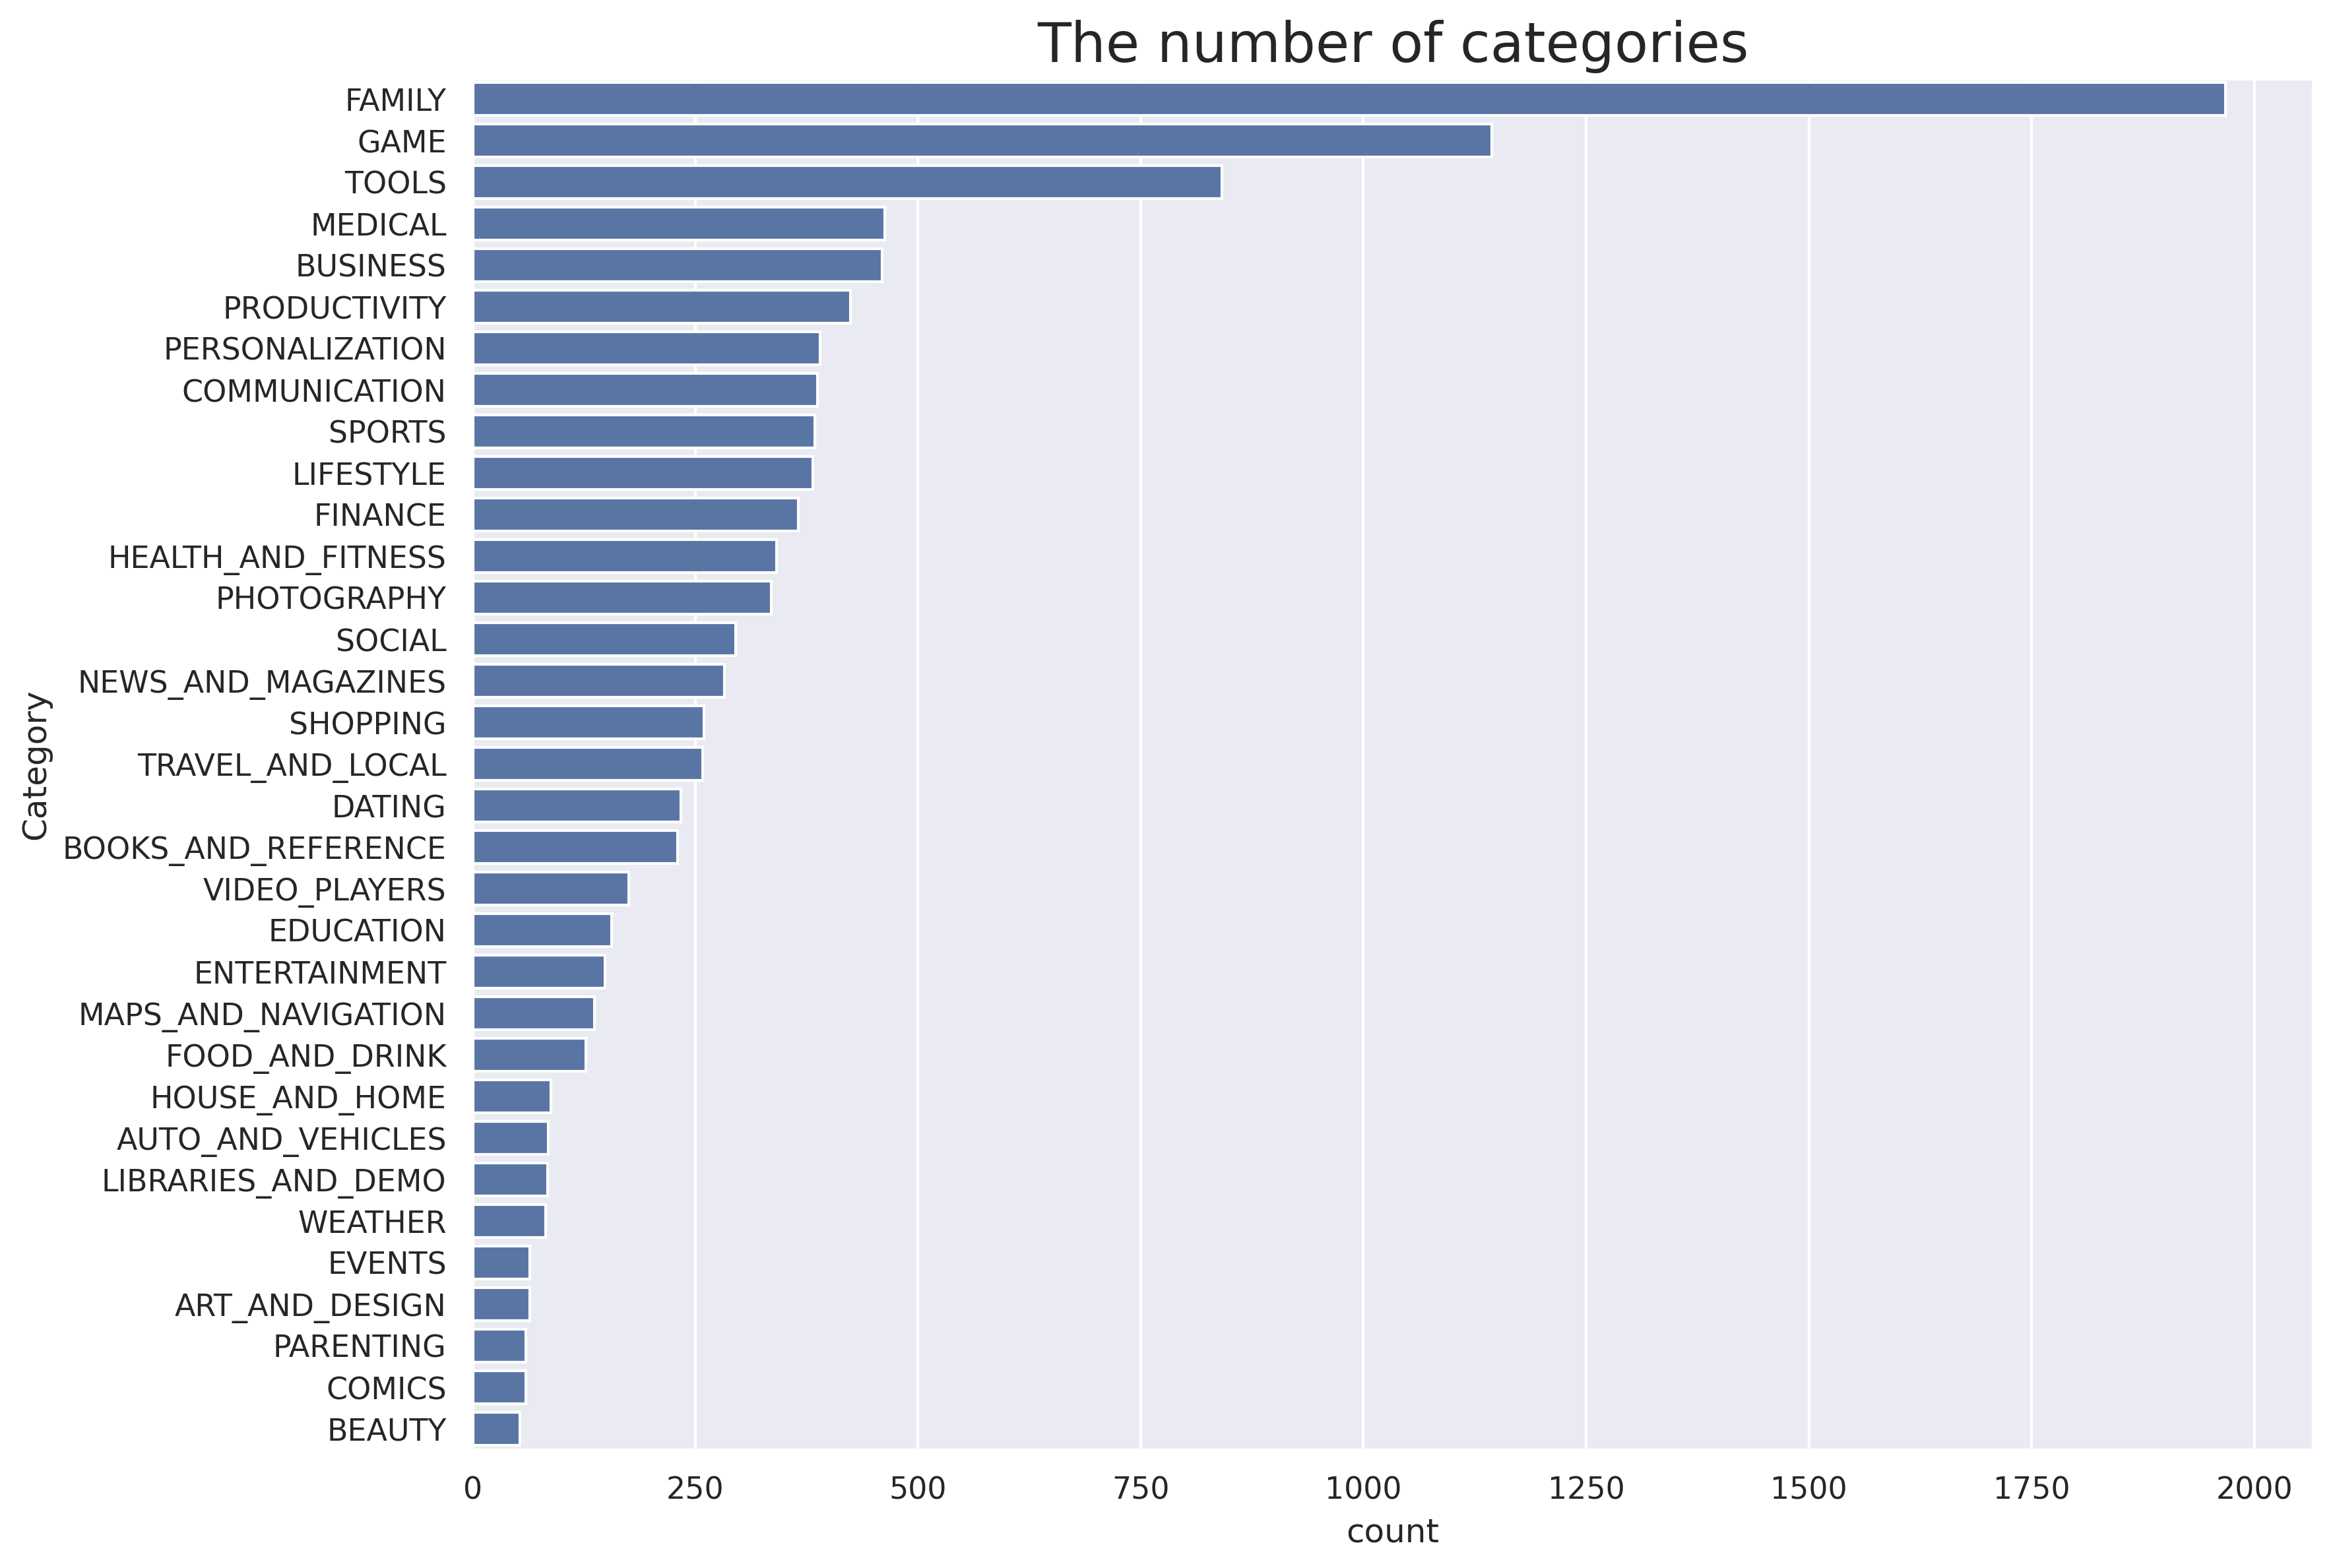

In [ ]:
cat_num = df["Category"].value_counts()
sns.barplot(x = cat_num, y = cat_num.index)
plt.title("The number of categories", size=20)

Text(0.5, 1.0, 'Category & Price')

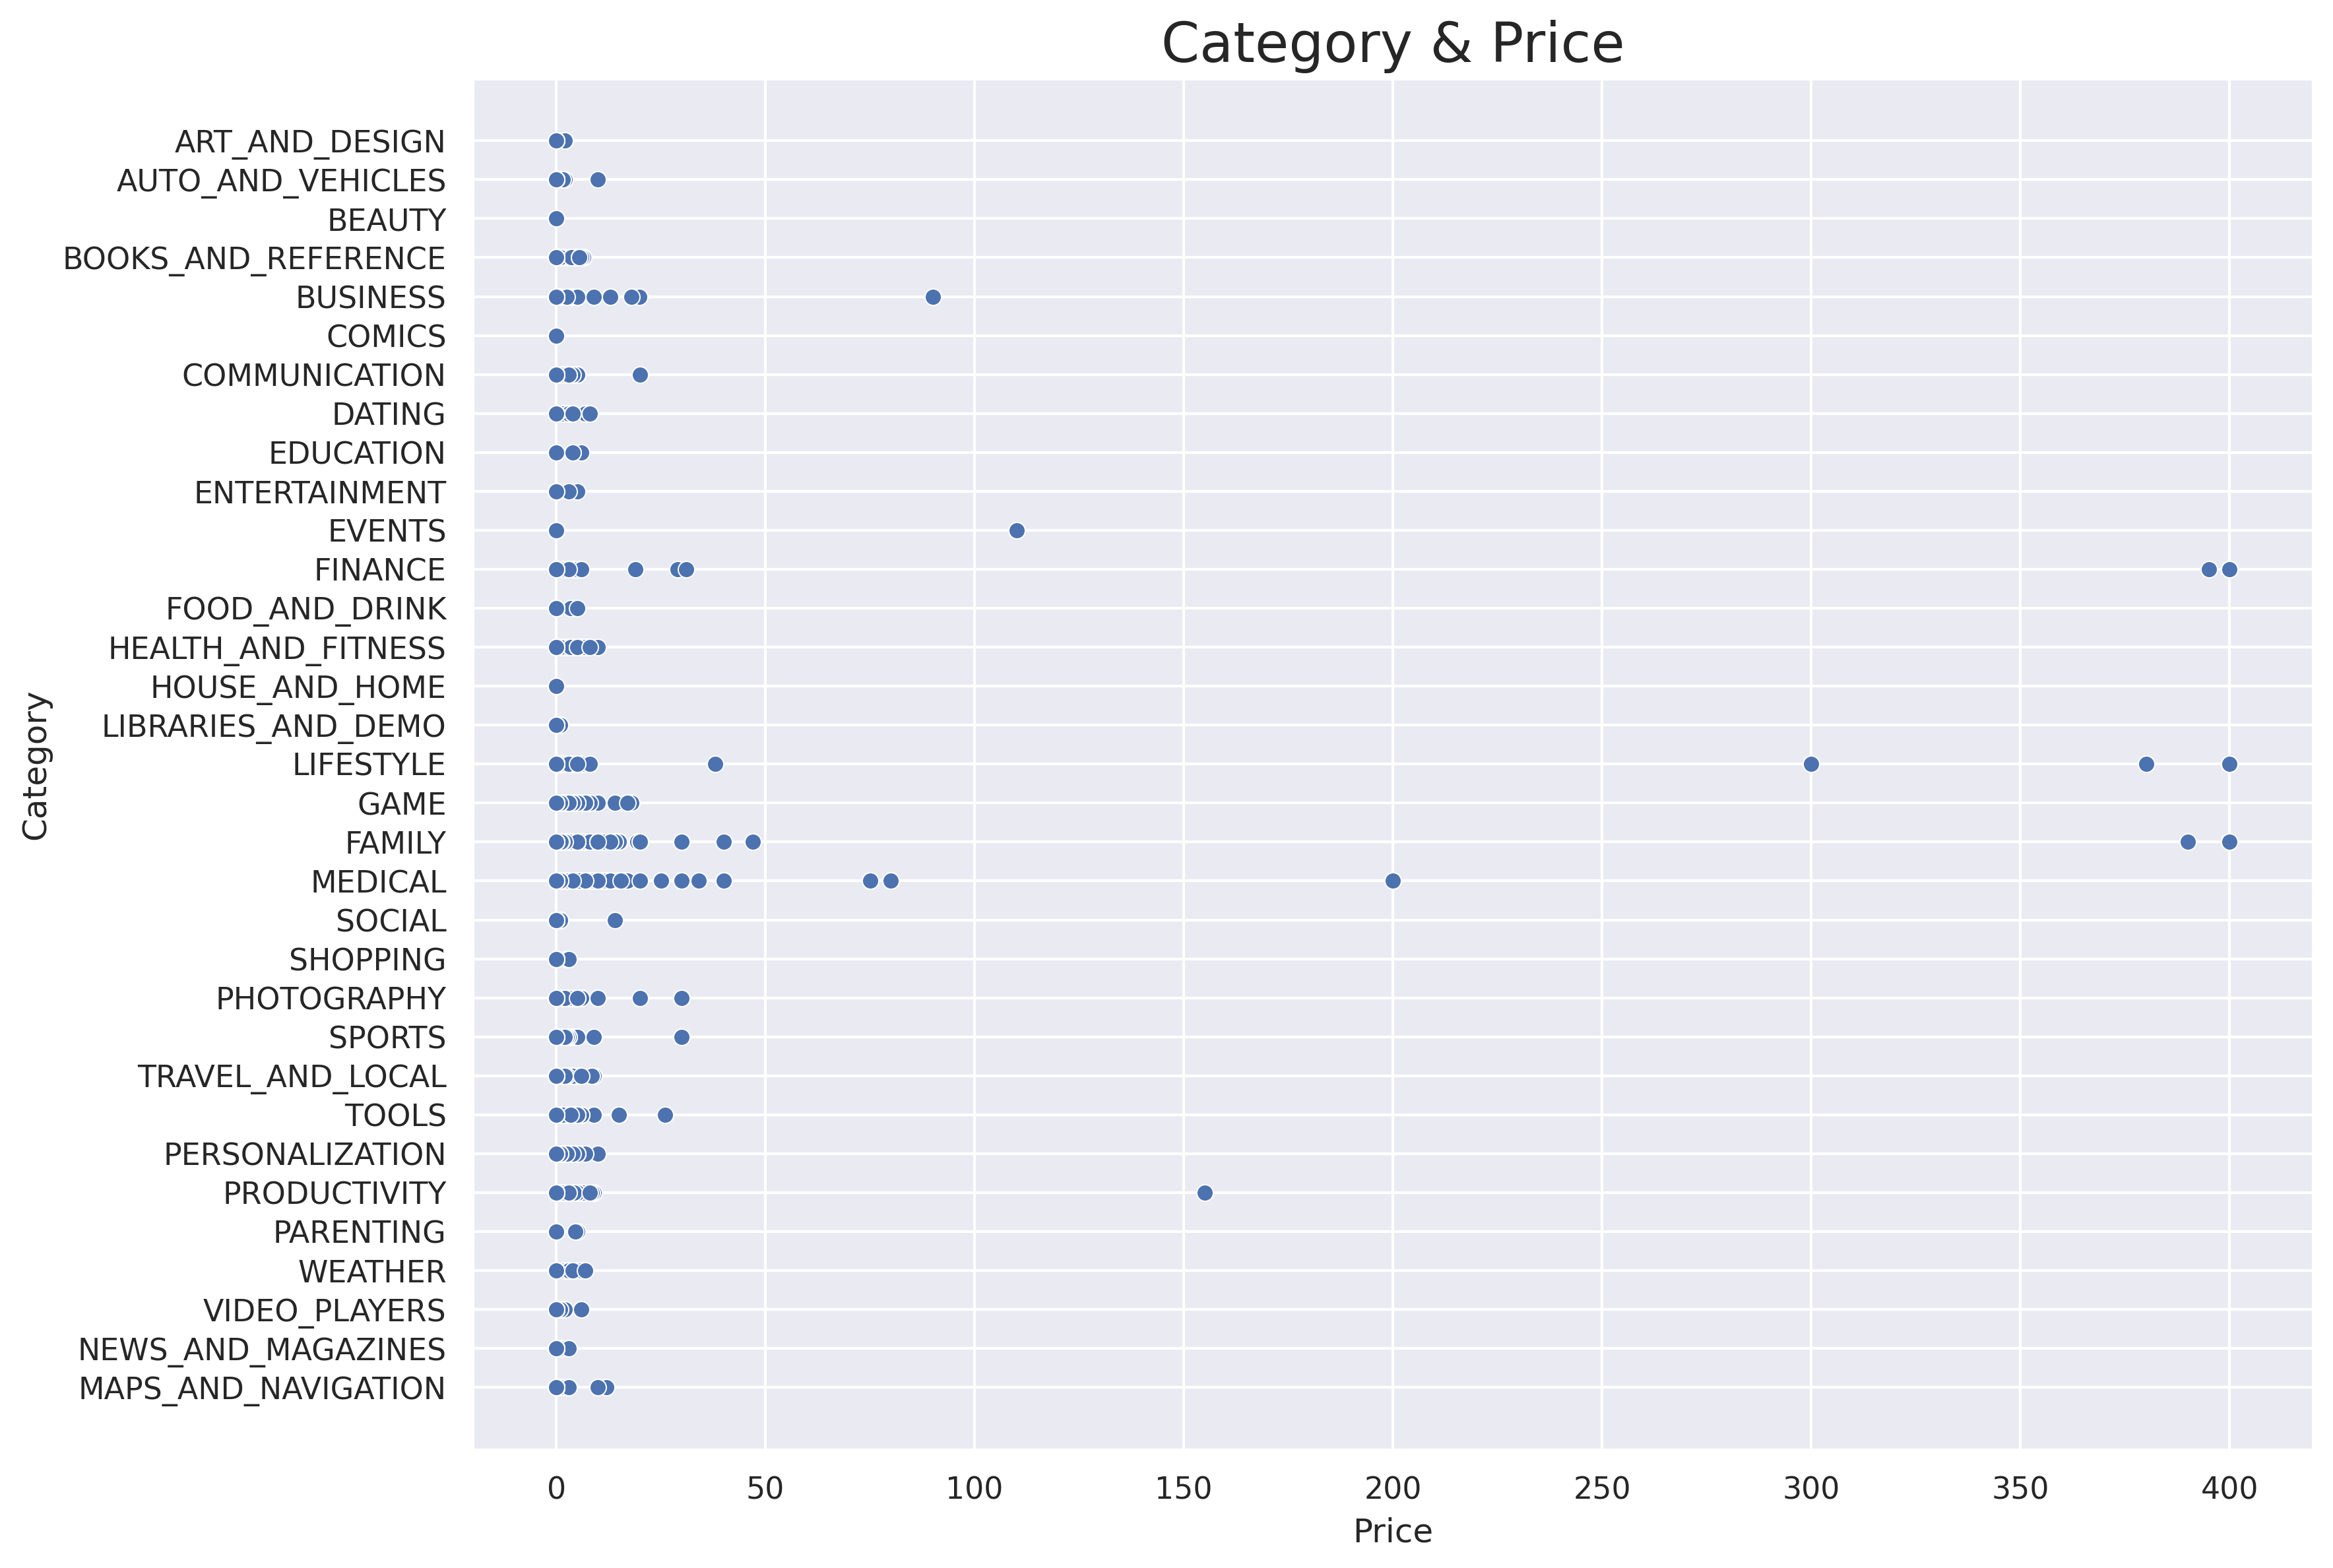

In [ ]:
sns.scatterplot(data = df, y = "Category", x = "Price")
plt.title("Category & Price", size=20)

Text(0.5, 1.0, 'Histogram with the kde for the rating column ')

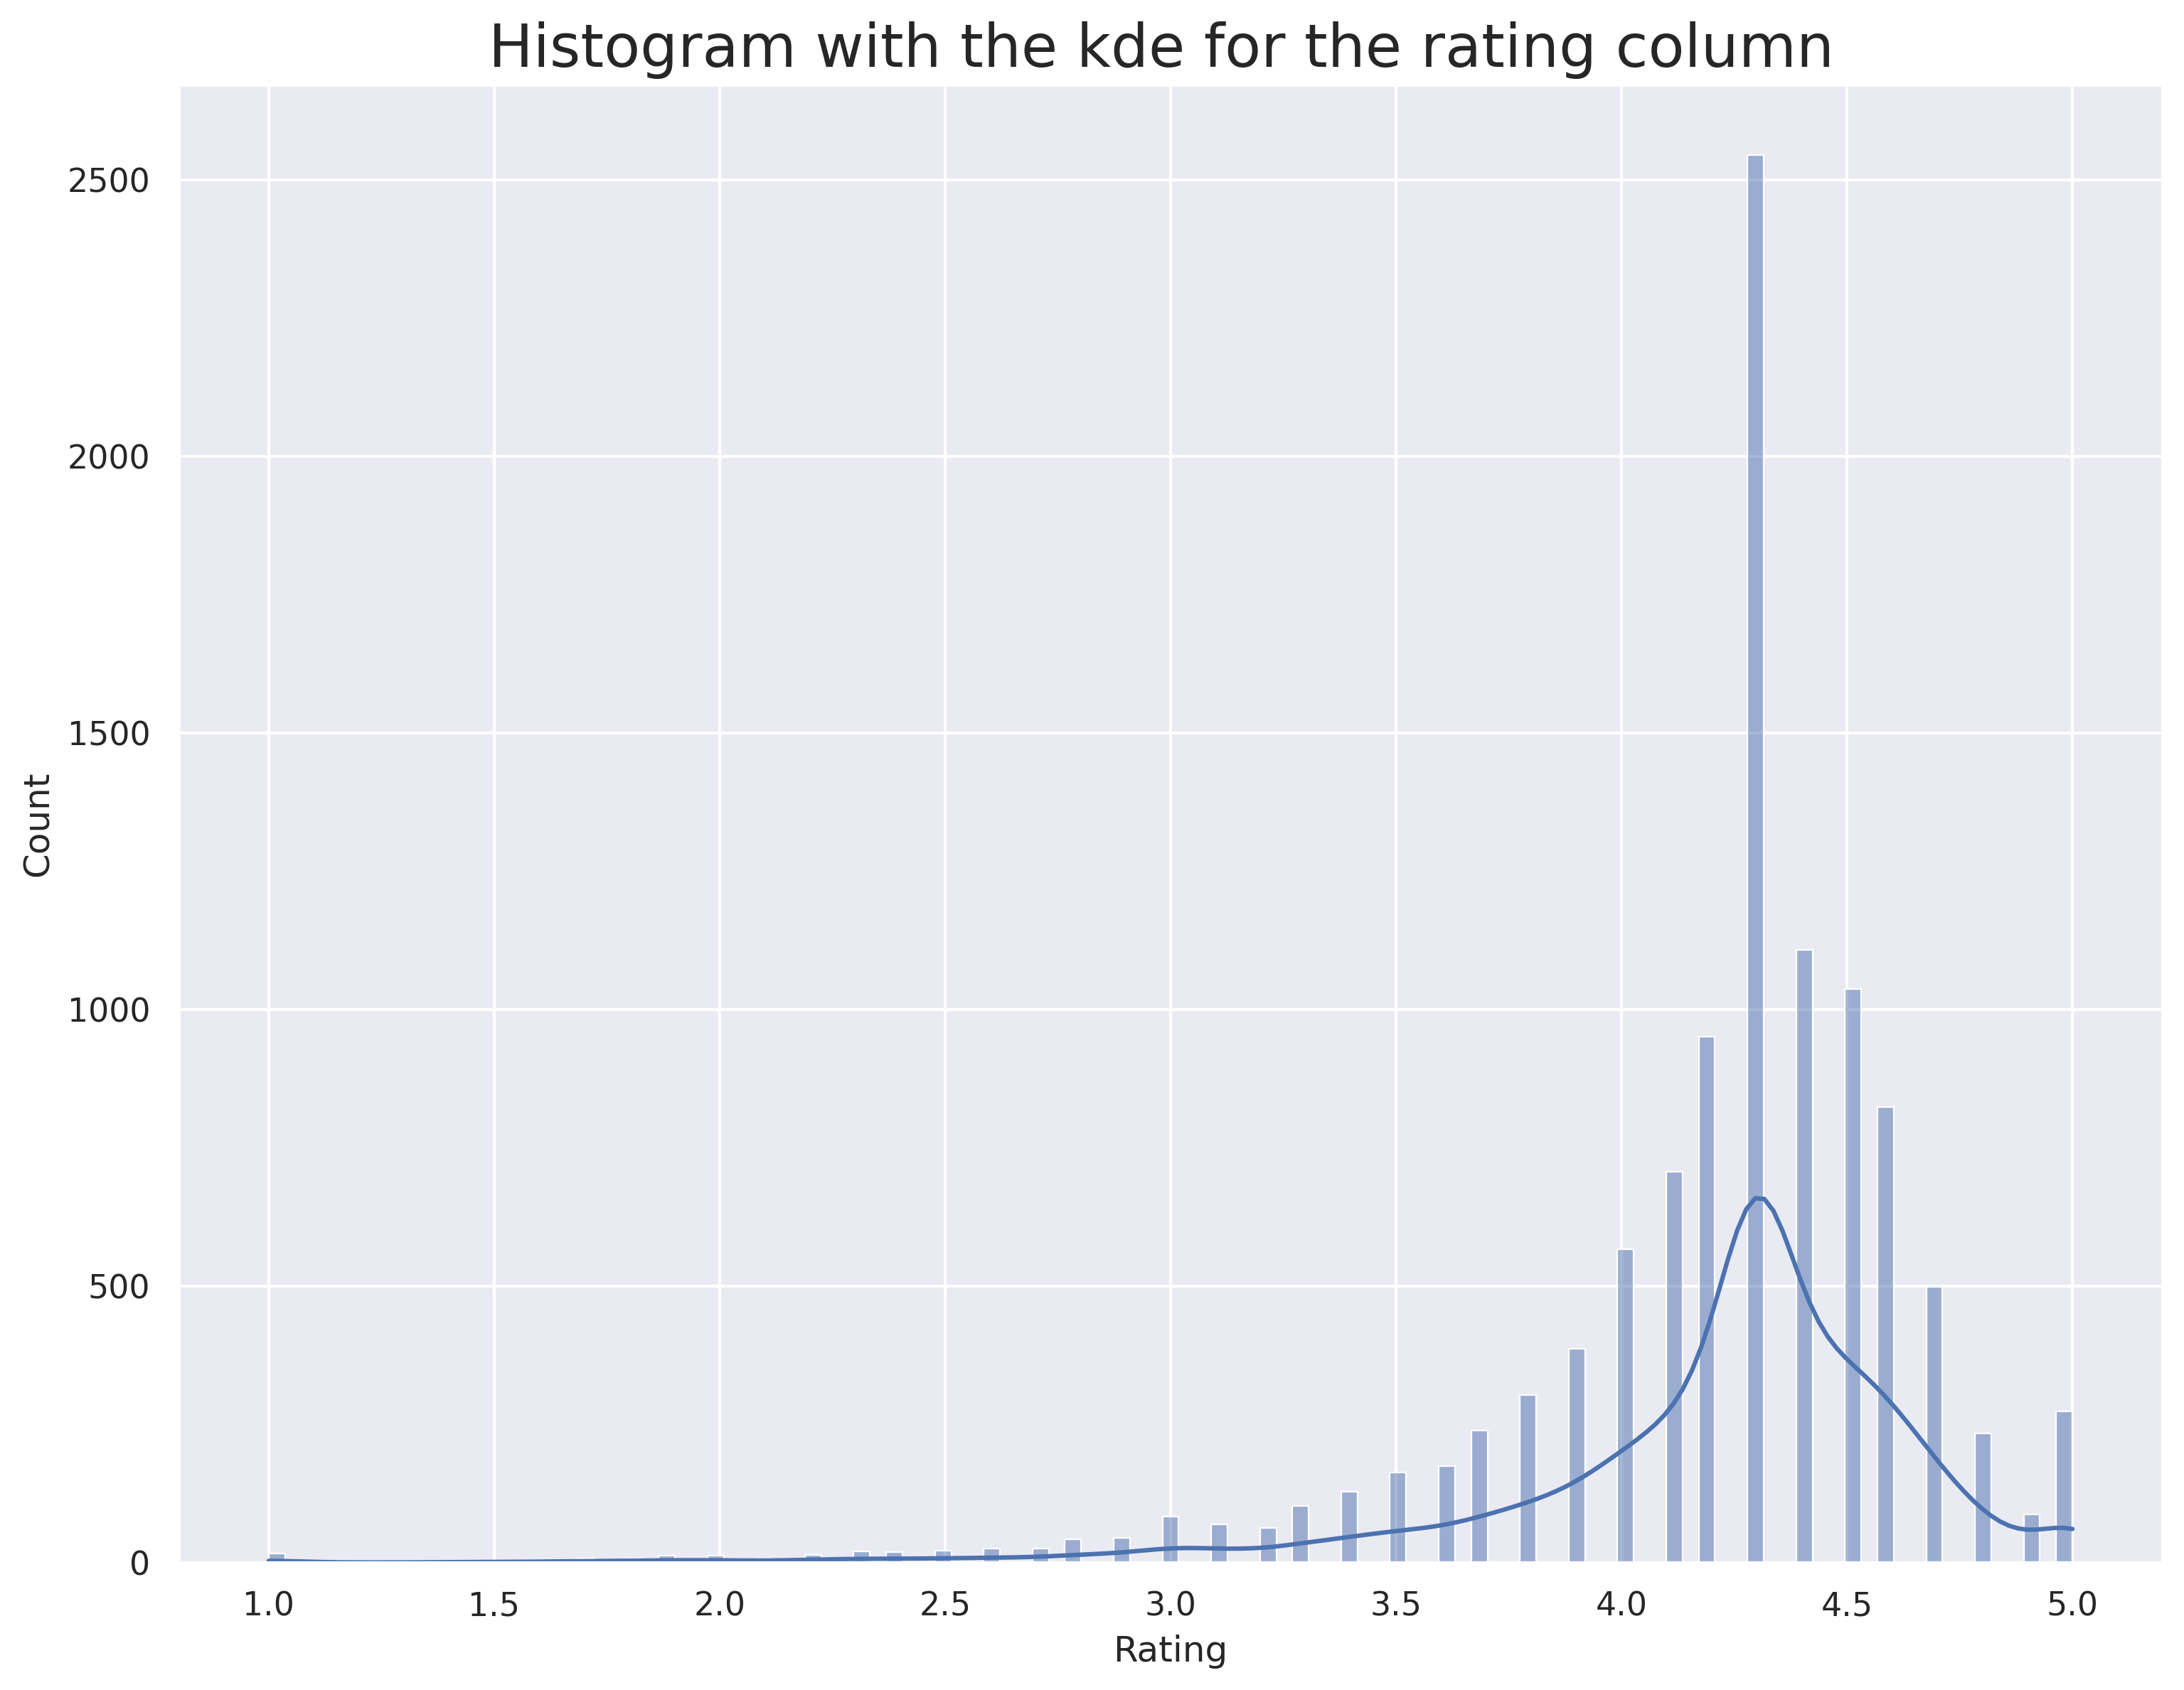

In [ ]:
sns.histplot(df["Rating"], kde = True)
plt.title("Histogram with the kde for the rating column ", size=20,)

Changing to Plotly

In [ ]:
# prompt: Install Plotly

!pip install plotly

import plotly.express as px


In [ ]:
# prompt: With Plotly Installed, Create a Graph comparing average rating per category, with different colors per bar

fig = px.bar(df.groupby('Category')['Rating'].mean().reset_index(), x='Category', y='Rating', color='Category')
fig.show()


In [ ]:


# prompt: Using Plotly already installed, create a histogram of date created binned by year not half year, with different colors per year

import plotly.express as px

fig = px.histogram(df, x="Last_Updated", color=df["Last_Updated"].dt.year,
                   nbins=len(df["Last_Updated"].dt.year.unique()),
                   title="Histogram of Last Updated by Year")
fig.update_layout(bargap=0.1)
fig.show()


In [ ]:
# prompt: Install Plotly, Then Create a scartterplot of Free Games, using Reviews and Installs

import plotly.express as px

# Assuming your DataFrame is named 'df' and you have 'Reviews', 'Installs', and 'Type' columns

# Filter for free games
free_games = df[df['Type'] == 'Free']

# Create a scatter plot using Plotly Express
fig = px.scatter(free_games, x='Reviews', y='Installs', title='Scatter Plot of Free Games: Reviews vs Installs')

# Customize the plot (optional)
fig.update_layout(xaxis_title='Reviews', yaxis_title='Installs')

# Show the plot
fig.show()


In [ ]:
# prompt: Install Plotly, Then Create a scartterplot of Free Games, using Reviews and Installs, Color Code using Genre

# Assuming your DataFrame is named 'df' and you have 'Reviews', 'Installs', 'Type', and 'Genres' columns

# Filter for free games
free_games = df[df['Type'] == 'Free']

# Create a scatter plot using Plotly Express with color coding by Genre
fig = px.scatter(free_games, x='Reviews', y='Installs', color='Genres', title='Scatter Plot of Free Games: Reviews vs Installs (Color Coded by Genre)')

# Customize the plot (optional)
fig.update_layout(xaxis_title='Reviews', yaxis_title='Installs')

# Show the plot
fig.show()


In [ ]:
# prompt: Install Plotly, Then Create a scartterplot of Free Games, using Reviews and Installs, Color Code using Genre. Only show Game Genres

# Assuming your DataFrame is named 'df' and you have 'Reviews', 'Installs', 'Type', and 'Genres' columns

# Filter for free games and Game Genres
free_games_game_genre = df[(df['Type'] == 'Free') & (df['Genres'] == 'Game')]

# Create a scatter plot using Plotly Express with color coding by Genre
fig = px.scatter(free_games_game_genre, x='Reviews', y='Installs', color='Genres', title='Scatter Plot of Free Games (Game Genres): Reviews vs Installs (Color Coded by Genre)')

# Customize the plot (optional)
fig.update_layout(xaxis_title='Reviews', yaxis_title='Installs')

# Show the plot
fig.show()


In [ ]:
# prompt: Install Plotly, Then Create a scartterplot of Apps using Reviews and Installs, Color Code using category

# Assuming your DataFrame is named 'df' and you have 'Reviews', 'Installs', and 'Category' columns

# Create a scatter plot using Plotly Express with color coding by Category
fig = px.scatter(df, x='Reviews', y='Installs', color='Category', title='Scatter Plot of Apps: Reviews vs Installs (Color Coded by Category)')

# Customize the plot (optional)
fig.update_layout(xaxis_title='Reviews', yaxis_title='Installs')

# Show the plot
fig.show()


In [ ]:
# prompt: Install Plotly, Then Create a scartterplot of Apps using Reviews and Installs, Color Code using category, and make the chart smaller

import plotly.express as px

# Assuming your DataFrame is named 'df' and you have 'Reviews', 'Installs', and 'Category' columns

# Create a scatter plot using Plotly Express with color coding by Category
fig = px.scatter(df, x='Reviews', y='Installs', color='Category', title='Scatter Plot of Apps: Reviews vs Installs (Color Coded by Category)')

# Customize the plot (optional)
fig.update_layout(xaxis_title='Reviews', yaxis_title='Installs', width=800, height=600) # Adjust width and height as needed

# Show the plot
fig.show()


In [ ]:
# prompt: Install Plotly, Then Create a scartterplot of Apps using Reviews and Installs, Color Code using category, Exclude the Game Category

# Assuming your DataFrame is named 'df' and you have 'Reviews', 'Installs', and 'Category' columns

# Filter out the Game Category
df_no_game = df[df['Category'] != 'GAME']

# Create a scatter plot using Plotly Express with color coding by Category
fig = px.scatter(df_no_game, x='Reviews', y='Installs', color='Category', title='Scatter Plot of Apps (Excluding Games): Reviews vs Installs (Color Coded by Category)')

# Customize the plot (optional)
fig.update_layout(xaxis_title='Reviews', yaxis_title='Installs')

# Show the plot
fig.show()


In [ ]:
# prompt: Install Plotly, Then Create a scartterplot of Apps using Reviews and Installs, Show Name of App on Mouse Rollover, Only include Game Category, Color Code by Genre

# Assuming your DataFrame is named 'df' and you have 'Reviews', 'Installs', 'Category', 'App', and 'Genres' columns

# Filter for apps in the Game category
game_apps = df[df['Category'] == 'GAME']

# Create a scatter plot using Plotly Express with color coding by Genre and showing app name on hover
fig = px.scatter(game_apps, x='Reviews', y='Installs', color='Genres', hover_data=['App'],
                 title='Scatter Plot of Game Apps: Reviews vs Installs (Color Coded by Genre)')

# Customize the plot (optional)
fig.update_layout(xaxis_title='Reviews', yaxis_title='Installs')

# Show the plot
fig.show()


In [ ]:
# prompt:  Install Plotly, Then Create a scartterplot of Apps using Reviews and Installs, Show Name of App on Mouse Rollover, Only include Game Category, Color Code by Genre and make small

# Assuming your DataFrame is named 'df' and you have 'Reviews', 'Installs', 'Category', 'App', and 'Genres' columns

# Filter for apps in the Game category
game_apps = df[df['Category'] == 'GAME']

# Create a scatter plot using Plotly Express with color coding by Genre and showing app name on hover
fig = px.scatter(game_apps, x='Reviews', y='Installs', color='Genres', hover_data=['App'],
                 title='Scatter Plot of Game Apps: Reviews vs Installs (Color Coded by Genre)')

# Customize the plot (optional)
fig.update_layout(xaxis_title='Reviews', yaxis_title='Installs', width=800, height=600)  # Adjust width and height as needed

# Show the plot
fig.show()


In [ ]:
# prompt: Install Plotly, Then Create a Funnel Chart of apps using reviews and installs, Show Name of App on Mouse Rollover, Only include Game Category, Color Code by Genre

import plotly.express as px

# Assuming your DataFrame is named 'df' and you have 'Reviews', 'Installs', 'Category', 'App', and 'Genres' columns

# Filter for apps in the Game category
game_apps = df[df['Category'] == 'GAME']

# Create a funnel chart using Plotly Express with color coding by Genre and showing app name on hover
fig = px.funnel(game_apps, x='Reviews', y='Installs', color='Genres', hover_data=['App'],
                 title='Funnel Chart of Game Apps: Reviews vs Installs (Color Coded by Genre)')

# Customize the plot (optional)
fig.update_layout(xaxis_title='Reviews', yaxis_title='Installs')

# Show the plot
fig.show()


In [ ]:
# prompt: Install Plotly, Then Create a Funnel Chart of apps using reviews Only show top 5, Show Name of App on Mouse Rollover, Only include Game Category, Color Code by Genre

# Assuming your DataFrame is named 'df' and you have 'Reviews', 'Installs', 'Category', 'App', and 'Genres' columns

# Filter for apps in the Game category
game_apps = df[df['Category'] == 'GAME']

# Sort the DataFrame by Reviews in descending order and take the top 5
top_5_game_apps = game_apps.sort_values('Reviews', ascending=False).head(5)

# Create a funnel chart using Plotly Express with color coding by Genre and showing app name on hover
fig = px.funnel(top_5_game_apps, x='Reviews', y='App', color='Genres',
                 title='Funnel Chart of Top 5 Game Apps: Reviews')

# Customize the plot (optional)
fig.update_layout(xaxis_title='Reviews', yaxis_title='App Name')

# Show the plot
fig.show()


In [ ]:
# prompt: Show Rows with "Clash of Clans" in the Name of the app

clash_of_clans_rows = df[df['App'].str.contains('Clash of Clans', case=False)]
print(clash_of_clans_rows)


                 App Category  Rating   Reviews  Size   Installs  Type  Price  \
1670  Clash of Clans     GAME     4.6  44891723  98.0  100000000  Free    0.0   
1704  Clash of Clans     GAME     4.6  44891723  98.0  100000000  Free    0.0   
1879  Clash of Clans     GAME     4.6  44893888  98.0  100000000  Free    0.0   
3986  Clash of Clans   FAMILY     4.6  44881447  98.0  100000000  Free    0.0   

     Content_Rating    Genres Last_Updated Current_Ver Android_Ver  
1670   Everyone 10+  Strategy   2018-07-15   10.322.16  4.1 and up  
1704   Everyone 10+  Strategy   2018-07-15   10.322.16  4.1 and up  
1879   Everyone 10+  Strategy   2018-07-15   10.322.16  4.1 and up  
3986   Everyone 10+  Strategy   2018-07-15   10.322.16  4.1 and up  


In [ ]:
# prompt: Write code that shows all rows with the same text in the app name

app_name_to_search = "Subway Surfers"  # Replace with the app name you want to search for

rows_with_app_name = df[df['App'].str.contains(app_name_to_search, case=False)]

print(rows_with_app_name)


                 App Category  Rating   Reviews  Size    Installs  Type  \
1654  Subway Surfers     GAME     4.5  27722264  76.0  1000000000  Free   
1700  Subway Surfers     GAME     4.5  27723193  76.0  1000000000  Free   
1750  Subway Surfers     GAME     4.5  27724094  76.0  1000000000  Free   
1872  Subway Surfers     GAME     4.5  27725352  76.0  1000000000  Free   
1917  Subway Surfers     GAME     4.5  27725352  76.0  1000000000  Free   
3896  Subway Surfers     GAME     4.5  27711703  76.0  1000000000  Free   

      Price Content_Rating  Genres Last_Updated Current_Ver Android_Ver  
1654    0.0   Everyone 10+  Arcade   2018-07-12      1.90.0  4.1 and up  
1700    0.0   Everyone 10+  Arcade   2018-07-12      1.90.0  4.1 and up  
1750    0.0   Everyone 10+  Arcade   2018-07-12      1.90.0  4.1 and up  
1872    0.0   Everyone 10+  Arcade   2018-07-12      1.90.0  4.1 and up  
1917    0.0   Everyone 10+  Arcade   2018-07-12      1.90.0  4.1 and up  
3896    0.0   Everyone 10+  Ar

In [ ]:
# prompt: Write code to show all rows with identical Size, Installs, Tyoe, Price, Content_Rating, Genres and Rating . Delete One of the duplicate Rows, Count how rows were deleted

# Find duplicate rows based on specified columns
duplicate_rows = df[df.duplicated(subset=['Size', 'Installs', 'Type', 'Price', 'Content_Rating', 'Genres', 'Rating'], keep=False)]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

# Delete one of the duplicate rows (keeping the first occurrence)
df.drop_duplicates(subset=['Size', 'Installs', 'Type', 'Price', 'Content_Rating', 'Genres', 'Rating'], keep='first', inplace=True)

# Count how many rows were deleted
rows_deleted = len(duplicate_rows) - len(df[df.duplicated(subset=['Size', 'Installs', 'Type', 'Price', 'Content_Rating', 'Genres', 'Rating'], keep=False)])
print(f"\nNumber of rows deleted: {rows_deleted}")


Duplicate Rows:
                                                  App           Category  \
1                                 Coloring book moana     ART_AND_DESIGN   
23                             Mcqueen Coloring pages     ART_AND_DESIGN   
36     UNICORN - Color By Number & Pixel Art Coloring     ART_AND_DESIGN   
42                         Textgram - write on photos     ART_AND_DESIGN   
52                      Used Cars and Trucks for Sale  AUTO_AND_VEHICLES   
...                                               ...                ...   
10768                                            AAFP            MEDICAL   
10805                                   Scoreboard FR          LIFESTYLE   
10806                                 SnakeBite911 FR            MEDICAL   
10818                            Gold Quote - Gold.fr            FINANCE   
10826       Frim: get new friends on local chat rooms             SOCIAL   

       Rating  Reviews  Size  Installs  Type  Price Content_Rating  \
1

In [ ]:
df.shape

(9174, 13)

In [ ]:
# prompt: Write code that shows all rows with the same text in the app name

app_name_to_search = "Subway Surfers"  # Replace with the app name you want to search for

rows_with_app_name = df[df['App'].str.contains(app_name_to_search, case=False)]

print(rows_with_app_name)

                 App Category  Rating   Reviews  Size    Installs  Type  \
1654  Subway Surfers     GAME     4.5  27722264  76.0  1000000000  Free   

      Price Content_Rating  Genres Last_Updated Current_Ver Android_Ver  
1654    0.0   Everyone 10+  Arcade   2018-07-12      1.90.0  4.1 and up  


In [ ]:
# prompt: Install Plotly, Then Create a Funnel Chart of apps using reviews Only show top 5, Show Name of App on Mouse Rollover, Only include Game Category, Color Code by Genre

# Assuming your DataFrame is named 'df' and you have 'Reviews', 'Installs', 'Category', 'App', and 'Genres' columns

# Filter for apps in the Game category
game_apps = df[df['Category'] == 'GAME']

# Sort the DataFrame by Reviews in descending order and take the top 5
top_5_game_apps = game_apps.sort_values('Reviews', ascending=False).head(5)

# Create a funnel chart using Plotly Express with color coding by Genre and showing app name on hover
fig = px.funnel(top_5_game_apps, x='Reviews', y='App', color='Genres',
                 title='Funnel Chart of Top 5 Game Apps: Reviews')

# Customize the plot (optional)
fig.update_layout(xaxis_title='Reviews', yaxis_title='App Name')

# Show the plot
fig.show()


In [ ]:
# prompt: Install Plotly, Then Create a scartterplot of Apps using Reviews and Installs, Show Name of App on Mouse Rollover, Only include Game Category, Color Code by Genre

# Assuming your DataFrame is named 'df' and you have 'Reviews', 'Installs', 'Category', 'App', and 'Genres' columns

# Filter for apps in the Game category
game_apps = df[df['Category'] == 'GAME']

# Create a scatter plot using Plotly Express with color coding by Genre and showing app name on hover
fig = px.scatter(game_apps, x='Reviews', y='Installs', color='Genres', hover_data=['App'],
                 title='Scatter Plot of Game Apps: Reviews vs Installs (Color Coded by Genre)')

# Customize the plot (optional)
fig.update_layout(xaxis_title='Reviews', yaxis_title='Installs')

# Show the plot
fig.show()

In [ ]:
# prompt: Find highest average installs of all apps with category game and sort by genre, show results in a bar chart

# Filter for apps in the Game category
game_apps = df[df['Category'] == 'GAME']

# Group by genre and calculate the average installs for each genre
average_installs_by_genre = game_apps.groupby('Genres')['Installs'].mean()

# Sort the genres by average installs in descending order
sorted_average_installs = average_installs_by_genre.sort_values(ascending=False)

# Create a bar chart using Plotly Express
fig = px.bar(
    x=sorted_average_installs.index,
    y=sorted_average_installs.values,
    title='Average Installs of Game Apps by Genre (Sorted)',
    labels={'x': 'Genre', 'y': 'Average Installs'},
)

# Show the plot
fig.show()


In [ ]:
# prompt: Find highest average rating of all apps with category game and sort by genre, show results in a bar chart

# Filter for apps in the Game category
game_apps = df[df['Category'] == 'GAME']

# Group by genre and calculate the average rating for each genre
average_rating_by_genre = game_apps.groupby('Genres')['Rating'].mean()

# Sort the genres by average rating in descending order
sorted_average_rating = average_rating_by_genre.sort_values(ascending=False)

# Create a bar chart using Plotly Express
fig = px.bar(
    x=sorted_average_rating.index,
    y=sorted_average_rating.values,
    title='Average Rating of Game Apps by Genre (Sorted)',
    labels={'x': 'Genre', 'y': 'Average Rating'},
)

# Show the plot
fig.show()


In [ ]:
# prompt: Find highest average installs of all apps with category game and sort by genre, only show paid games, show results in a bar chart

# Filter for apps in the Game category and paid type
game_apps_paid = df[(df['Category'] == 'GAME') & (df['Type'] == 'Paid')]

# Group by genre and calculate the average installs for each genre
average_installs_by_genre = game_apps_paid.groupby('Genres')['Installs'].mean()

# Sort the genres by average installs in descending order
sorted_average_installs = average_installs_by_genre.sort_values(ascending=False)

# Create a bar chart using Plotly Express
fig = px.bar(
    x=sorted_average_installs.index,
    y=sorted_average_installs.values,
    title='Average Installs of Paid Game Apps by Genre (Sorted)',
    labels={'x': 'Genre', 'y': 'Average Installs'},
)

# Show the plot
fig.show()


In [ ]:
# prompt: Find highest average rating of all apps with category game and sort by genre, only show paid games, show results in a bar chart

# Filter for apps in the Game category and paid type
game_apps_paid = df[(df['Category'] == 'GAME') & (df['Type'] == 'Paid')]

# Group by genre and calculate the average rating for each genre
average_rating_by_genre = game_apps_paid.groupby('Genres')['Rating'].mean()

# Sort the genres by average rating in descending order
sorted_average_rating = average_rating_by_genre.sort_values(ascending=False)

# Create a bar chart using Plotly Express
fig = px.bar(
    x=sorted_average_rating.index,
    y=sorted_average_rating.values,
    title='Average Rating of Paid Game Apps by Genre (Sorted)',
    labels={'x': 'Genre', 'y': 'Average Rating'},
)

# Show the plot
fig.show()


In [ ]:
# prompt: Find highest average rating of all apps with category game and sort by genre, only show paid games, show results in a bar chart, with different colors for each bar

# Filter for apps in the Game category and paid type
game_apps_paid = df[(df['Category'] == 'GAME') & (df['Type'] == 'Paid')]

# Group by genre and calculate the average rating for each genre
average_rating_by_genre = game_apps_paid.groupby('Genres')['Rating'].mean()

# Sort the genres by average rating in descending order
sorted_average_rating = average_rating_by_genre.sort_values(ascending=False)

# Create a bar chart using Plotly Express with different colors for each bar
fig = px.bar(
    x=sorted_average_rating.index,
    y=sorted_average_rating.values,
    title='Average Rating of Paid Game Apps by Genre (Sorted)',
    labels={'x': 'Genre', 'y': 'Average Rating'},
    color=sorted_average_rating.index  # Use genre as color
)

# Show the plot
fig.show()


In [ ]:
# prompt: Find highest average rating of all apps with category game and sort by genre, only show paid games, show results in a bar chart that is color coded based on Genre

# Filter for apps in the Game category and paid type
game_apps_paid = df[(df['Category'] == 'GAME') & (df['Type'] == 'Paid')]

# Group by genre and calculate the average rating for each genre
average_rating_by_genre = game_apps_paid.groupby('Genres')['Rating'].mean()

# Sort the genres by average rating in descending order
sorted_average_rating = average_rating_by_genre.sort_values(ascending=False)

# Create a bar chart using Plotly Express with different colors for each bar
fig = px.bar(
    x=sorted_average_rating.index,
    y=sorted_average_rating.values,
    title='Average Rating of Paid Game Apps by Genre (Sorted)',
    labels={'x': 'Genre', 'y': 'Average Rating'},
    color=sorted_average_rating.index  # Use genre as color
)

# Show the plot
fig.show()


In [ ]:
# prompt: Create a Line Graph for Reviews vs Installs for Each Category. Split each category's data by year and make the dots larger, and only use one line per category. Make a Seperate Data Visualization with Average Values for Each Calegory, Sort Data by Average Installs

import plotly.express as px

# Group by Category and Year, calculate the average Reviews and Installs
df['Year'] = df['Last_Updated'].dt.year
category_year_data = df.groupby(['Category', 'Year'])[['Reviews', 'Installs']].mean().reset_index()


# Create a line graph using Plotly Express
fig = px.line(
    category_year_data,
    x='Year',
    y='Installs',
    color='Category',
    markers=True,  # Show markers for each data point
    title='Reviews vs Installs for Each Category (Split by Year)',
)

# Customize the plot
fig.update_traces(marker=dict(size=8))  # Increase the size of the markers
fig.update_layout(xaxis_title='Year', yaxis_title='Average Installs')

# Show the plot
fig.show()



# Calculate average Reviews and Installs for each category
category_average_data = df.groupby('Category')[['Reviews', 'Installs']].mean().reset_index()

# Sort by average Installs
category_average_data = category_average_data.sort_values('Installs', ascending=False)

# Create a bar chart using Plotly Express
fig = px.bar(
    category_average_data,
    x='Category',
    y='Installs',
    title='Average Installs for Each Category (Sorted)',
    labels={'Category': 'Category', 'Installs': 'Average Installs'},
)

# Show the plot
fig.show()


In [ ]:
# prompt: Create a Line Graph for Reviews vs Installs for Each Category. Only use Paid Apps. Split each category's data by year and make the dots larger, and only use one line per category. Make a Seperate Data Visualization with Average Values for Each Calegory, Sort Data by Average Installs

# Filter for paid apps
paid_apps = df[df['Type'] == 'Paid']

# Group by Category and Year, calculate the average Reviews and Installs
paid_apps['Year'] = paid_apps['Last_Updated'].dt.year
category_year_data_paid = paid_apps.groupby(['Category', 'Year'])[['Reviews', 'Installs']].mean().reset_index()


# Create a line graph using Plotly Express
fig = px.line(
    category_year_data_paid,
    x='Year',
    y='Installs',
    color='Category',
    markers=True,  # Show markers for each data point
    title='Reviews vs Installs for Each Category (Paid Apps, Split by Year)',
)

# Customize the plot
fig.update_traces(marker=dict(size=8))  # Increase the size of the markers
fig.update_layout(xaxis_title='Year', yaxis_title='Average Installs')

# Show the plot
fig.show()



# Calculate average Reviews and Installs for each category for paid apps
category_average_data_paid = paid_apps.groupby('Category')[['Reviews', 'Installs']].mean().reset_index()

# Sort by average Installs
category_average_data_paid = category_average_data_paid.sort_values('Installs', ascending=False)

# Create a bar chart using Plotly Express
fig = px.bar(
    category_average_data_paid,
    x='Category',
    y='Installs',
    title='Average Installs for Each Category (Paid Apps, Sorted)',
    labels={'Category': 'Category', 'Installs': 'Average Installs'},
)

# Show the plot
fig.show()


<ipython-input-48-7b03ab5aff42>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# prompt: Only using Paid apps, show the data for installs vs reviews. Make each scale using log. Find the correlation constant and place on graph in a key box that is a white box with a black border

import numpy as np

# Filter for paid apps
paid_apps = df[df['Type'] == 'Paid']

# Calculate the correlation coefficient
correlation = paid_apps['Installs'].corr(paid_apps['Reviews'])

# Create a scatter plot using Plotly Express with log scales
fig = px.scatter(
    paid_apps,
    x='Reviews',
    y='Installs',
    log_x=True,
    log_y=True,
    title='Installs vs. Reviews for Paid Apps (Log Scale)',
    labels={'Reviews': 'Reviews (Log Scale)', 'Installs': 'Installs (Log Scale)'},
)

# Add a key box with the correlation coefficient
fig.add_annotation(
    x=0.05,
    y=0.95,
    xref='paper',
    yref='paper',
    text=f'Correlation: {correlation:.2f}',
    showarrow=False,
    bgcolor='white',
    bordercolor='black',
    borderwidth=1,
)

# Show the plot
fig.show()


In [ ]:
# prompt: Only using Free apps, show the data for installs vs reviews. Make each scale using log. Find the correlation constant for each genre and create a table, print in a seprate graph. Color Code by Genre

# Filter for free apps
free_apps = df[df['Type'] == 'Free']

# Calculate the correlation coefficient between Reviews and Installs for each genre
genre_correlations = free_apps.groupby('Genres').apply(lambda x: x['Installs'].corr(x['Reviews'])).reset_index(name='Correlation')

# Create a scatter plot with log scales and color-coded by genre
fig = px.scatter(
    free_apps,
    x='Reviews',
    y='Installs',
    color='Genres',
    log_x=True,
    log_y=True,
    title='Installs vs. Reviews for Free Apps (Log Scale, Color-coded by Genre)',
    labels={'Reviews': 'Reviews (Log Scale)', 'Installs': 'Installs (Log Scale)'},
)

# Show the plot
fig.show()

# Print the correlation table in a separate graph
fig_table = px.bar(
    genre_correlations,
    x='Genres',
    y='Correlation',
    title='Correlation between Reviews and Installs for Each Genre',
    labels={'Genres': 'Genre', 'Correlation': 'Correlation Coefficient'},
)

# Show the table plot
fig_table.show()


<ipython-input-50-f540df51ec38>:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
# prompt: Only using Free apps that have the genre "Food & Drink", show the data for installs vs reviews. Make each scale using log. When you rollover a dot make it so you can see the name, year it was downloaded and the installs and reviews

# Filter for free apps with the "Food & Drink" genre
food_drink_free_apps = df[(df['Type'] == 'Free') & (df['Genres'] == 'Food & Drink')]

# Create a scatter plot using Plotly Express with log scales and hover data
fig = px.scatter(
    food_drink_free_apps,
    x='Reviews',
    y='Installs',
    log_x=True,
    log_y=True,
    hover_data=['App', 'Last_Updated', 'Installs', 'Reviews'],
    title='Installs vs. Reviews for Free Food & Drink Apps (Log Scale)',
    labels={'Reviews': 'Reviews (Log Scale)', 'Installs': 'Installs (Log Scale)'},
)

# Show the plot
fig.show()


In [ ]:
# prompt: List Paid Weather Apps

# Filter for paid apps in the Weather category
paid_weather_apps = df[(df['Type'] == 'Paid') & (df['Category'] == 'WEATHER')]

# Print the list of paid weather apps
print(paid_weather_apps[['App', 'Rating', 'Reviews', 'Installs']])


                                                    App  Rating  Reviews  \
3658                                   Weather Live Pro     4.8    17493   
4133                                       Weather Live     4.5    76593   
4716   W Pro - Weather Forecast & Animated Weather Maps     3.8       11   
4955                 MyRadar NOAA Weather Radar Ad Free     4.5     3005   
4962                      Weather & Radar Pro - Ad-Free     4.5    25243   
7332                                    Weather Data CH     4.3       15   
8912                               Weather Forecast Pro     4.7    14051   
10583                           Florida Tides & Weather     3.8       30   

       Installs  
3658     100000  
4133     500000  
4716        500  
4955      10000  
4962     100000  
7332        500  
8912     100000  
10583      1000  


In [ ]:
# prompt: With Plotly Installed, Create a Graph comparing average rating per category, with different colors per bar, in order of average rating

# Group by Category and calculate the average rating for each category
average_rating_by_category = df.groupby('Category')['Rating'].mean()

# Sort the categories by average rating in descending order
sorted_average_rating = average_rating_by_category.sort_values(ascending=False)

# Create a bar chart using Plotly Express with different colors for each bar
fig = px.bar(
    x=sorted_average_rating.index,
    y=sorted_average_rating.values,
    title='Average Rating of Apps by Category (Sorted)',
    labels={'x': 'Category', 'y': 'Average Rating'},
    color=sorted_average_rating.index  # Use category as color
)

# Show the plot
fig.show()


In [ ]:
# prompt: Using Plotly create a scatterplot for Apps that have the genres Sports, Strategy and Causal with Installs and reviews. Make it color coded by genre. Use log scales and make it change the size of the graph, not the dots. Show the name of the app on rollover. Show the correlation between installs and reviews for each genre in a key

# Filter for apps with the specified genres
selected_genres = ['Sports', 'Strategy', 'Casual']
filtered_apps = df[df['Genres'].isin(selected_genres)]

# Calculate the correlation coefficient between Reviews and Installs for each genre
genre_correlations = filtered_apps.groupby('Genres').apply(lambda x: x['Installs'].corr(x['Reviews'])).reset_index(name='Correlation')

# Create a scatter plot with log scales and color-coded by genre
fig = px.scatter(
    filtered_apps,
    x='Reviews',
    y='Installs',
    color='Genres',
    log_x=True,
    log_y=True,
    hover_data=['App'],
    title='Installs vs. Reviews for Sports, Strategy, and Casual Apps (Log Scale, Color-coded by Genre)',
    labels={'Reviews': 'Reviews (Log Scale)', 'Installs': 'Installs (Log Scale)'},
)

# Customize the plot to change the size of the graph
fig.update_layout(width=1000, height=600)  # Adjust width and height as needed


# Add key boxes with correlation coefficients for each genre
for genre, correlation in zip(genre_correlations['Genres'], genre_correlations['Correlation']):
    fig.add_annotation(
        x=0.05,
        y=0.90 - 0.05 * (selected_genres.index(genre)),
        xref='paper',
        yref='paper',
        text=f'{genre}: Correlation = {correlation:.2f}',
        showarrow=False,
        bgcolor='white',
        bordercolor='black',
        borderwidth=1,
    )

# Show the plot
fig.show()


<ipython-input-54-3c334c34658e>:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
# prompt: Using Plotly create a scatterplot for Apps that have the genres Sports, Strategy and Causal with Installs and reviews. Make it color coded by genre. Use log scales and make it change the size of the graph, not the dots. Show the name of the app, as well as change the style of dot based on content rating. Make the dots the same size

import plotly.express as px

# Filter for apps with the specified genres
selected_genres = ['Sports', 'Strategy', 'Casual']
apps_selected_genres = df[df['Genres'].isin(selected_genres)]

# Create a scatter plot using Plotly Express with log scales and color-coded by genre
fig = px.scatter(
    apps_selected_genres,
    x='Reviews',
    y='Installs',
    color='Genres',
    hover_data=['App'],
    log_x=True,
    log_y=True,
    size_max=10,  # Keep the size of the dots consistent
    symbol='Content_Rating',  # Use content rating to change the style of the dot
    title='Installs vs. Reviews for Sports, Strategy, and Casual Apps (Log Scale, Color-coded by Genre)',
    labels={'Reviews': 'Reviews (Log Scale)', 'Installs': 'Installs (Log Scale)'},
)

# Customize the plot with adjusted width and height
fig.update_layout(width=1000, height=800)

# Show the plot
fig.show()



In [ ]:
# prompt: Using Plotly create a scatterplot for Apps that have the genres Sports, Causal and Strategy with Installs and reviews. Make it color coded by content rating. and make it change the size of the graph, not the dots. Show the name of the app, as well as change the style of dot based on Genre, but same size dots. Don;t use log scales. Only show the top 5 games in installs per Genre

import plotly.express as px

# Filter for apps with the specified genres
selected_genres = ['Sports', 'Strategy', 'Casual']
apps_selected_genres = df[df['Genres'].isin(selected_genres)]

# Sort the apps by installs within each genre and take the top 5
top_apps_by_genre = apps_selected_genres.groupby('Genres').apply(lambda x: x.nlargest(5, 'Installs')).reset_index(drop=True)

# Create a scatter plot using Plotly Express with color-coded by content rating
fig = px.scatter(
    top_apps_by_genre,
    x='Reviews',
    y='Installs',
    color='Content_Rating',
    hover_data=['App'],
    size_max=10,  # Keep the size of the dots consistent
    symbol='Genres',  # Use genre to change the style of the dot
    title='Installs vs. Reviews for Sports, Strategy, and Casual Apps (Top 5 in Installs)',
    labels={'Reviews': 'Reviews', 'Installs': 'Installs'},
)

# Customize the plot with adjusted width and height
fig.update_layout(width=850, height=700)  # Adjust width and height as needed

# Show the plot
fig.show()


<ipython-input-56-82c77cc6cb76>:10: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
# prompt: Using Plotly create a scatterplot for Apps that have the genres Sports, Causal and Strategy with Installs and reviews. Make it color coded by content rating. and make it change the size of the graph, not the dots. Show the name of the app, as well as change the style of dot based on Genre, but same size dots. Don;t use log scales. Only show the top 5 games in reviews per Genre. reviews as X axis

# Filter for apps with the specified genres
selected_genres = ['Sports', 'Strategy', 'Casual']
apps_selected_genres = df[df['Genres'].isin(selected_genres)]

# Sort the apps by reviews within each genre and take the top 5
top_apps_by_genre = apps_selected_genres.groupby('Genres').apply(lambda x: x.nlargest(5, 'Reviews')).reset_index(drop=True)


# Create a scatter plot using Plotly Express with color-coded by content rating
fig = px.scatter(
    top_apps_by_genre,
    x='Reviews',
    y='Installs',
    color='Content_Rating',
    hover_data=['App'],
    size_max=10,  # Keep the size of the dots consistent
    symbol='Genres',  # Use genre to change the style of the dot
    title='Installs vs. Reviews for Sports, Strategy, and Casual Apps (Top 5 per Genre)',
    labels={'Reviews': 'Reviews', 'Installs': 'Installs'},
)

# Customize the plot with adjusted width and height
fig.update_layout(width=800, height=600)  # Adjust width and height as needed

# Show the plot
fig.show()


<ipython-input-57-19aa5fbaa5dd>:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
# prompt: Using Plotly create a scatterplot for Apps that have the genres Causal with Installs and reviews. Make it color coded by content rating. Use log scales and make it change the size of the graph, not the dots. Show the name of the app, as well as change the style of dot based on content rating. Make the dots the same size

# Filter for apps with the "Casual" genre
casual_apps = df[df['Genres'] == 'Casual']

# Create a scatter plot using Plotly Express with log scales and color-coded by content rating
fig = px.scatter(
    casual_apps,
    x='Reviews',
    y='Installs',
    color='Content_Rating',
    hover_data=['App'],
    log_x=True,
    log_y=True,
    size_max=10,  # Keep the size of the dots consistent
    symbol='Content_Rating',  # Use content rating to change the style of the dot
    title='Installs vs. Reviews for Casual Apps (Log Scale, Color-coded by Content Rating)',
    labels={'Reviews': 'Reviews (Log Scale)', 'Installs': 'Installs (Log Scale)'},
)

# Customize the plot with adjusted width and height
fig.update_layout(width=1000, height=800)

# Show the plot
fig.show()


In [ ]:
# prompt: Using Plotly create a scatterplot for Apps that have the genres Sports, Causal and Strategy with Installs and reviews. Make it color coded by content rating. and make it change the size of the graph, not the dots. Show the name of the app, as well as change the style of dot based on Genre, but same size dots. Don;t use log scales. Only show the top 5 games in reviews per Genre. reviews as X axis

# Filter for apps with the specified genres
selected_genres = ['Sports', 'Strategy', 'Casual']
apps_selected_genres = df[df['Genres'].isin(selected_genres)]

# Sort the apps by reviews within each genre and take the top 5
top_apps_by_genre = apps_selected_genres.groupby('Genres').apply(lambda x: x.nlargest(5, 'Reviews')).reset_index(drop=True)

# Create a scatter plot using Plotly Express with color-coded by content rating
fig = px.scatter(
    top_apps_by_genre,
    x='Reviews',
    y='Installs',
    color='Content_Rating',
    hover_data=['App'],
    size_max=10,  # Keep the size of the dots consistent
    symbol='Genres',  # Use genre to change the style of the dot
    title='Installs vs. Reviews for Sports, Strategy, and Casual Apps (Top 5 in Reviews)',
    labels={'Reviews': 'Reviews', 'Installs': 'Installs'},
)

# Customize the plot with adjusted width and height
fig.update_layout(width=800, height=600)  # Adjust width and height as needed

# Show the plot
fig.show()


<ipython-input-59-7b496a9998ba>:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
# prompt: Create a Table with the top 5 highest installed games in Sports, Casual and Strategy Games. Also include the content rating and name of app. Make it display in only 15 rows. Export it to excel

# Filter for apps with the specified genres
selected_genres = ['Sports', 'Strategy', 'Casual']
apps_selected_genres = df[df['Genres'].isin(selected_genres)]

# Sort the apps by installs within each genre and take the top 5
top_apps_by_genre = apps_selected_genres.groupby('Genres').apply(lambda x: x.nlargest(5, 'Installs')).reset_index(drop=True)

# Select the relevant columns
top_apps_table = top_apps_by_genre[['App', 'Genres', 'Content_Rating', 'Installs']]

# Display the table with only 15 rows (adjust as needed)
print(top_apps_table.head(15))


# Export the table to Excel
top_apps_table.head(15).to_excel('top_installed_games.xlsx', index=False)

# Download the Excel file
files.download('top_installed_games.xlsx')


<ipython-input-60-aeceb242fd8d>:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



                                                  App    Genres  \
0                                    Candy Crush Saga    Casual   
1                                                 Pou    Casual   
2                                      My Talking Tom    Casual   
3                               Candy Crush Soda Saga    Casual   
4            Minion Rush: Despicable Me Official Game    Casual   
5                                         8 Ball Pool    Sports   
6                                         Score! Hero    Sports   
7                            Dream League Soccer 2018    Sports   
8                                          3D Bowling    Sports   
9                                         FIFA Soccer    Sports   
10                                       Clash Royale  Strategy   
11                            Plants vs. Zombies FREE  Strategy   
12                                     Clash of Clans  Strategy   
13              Castle Clash: Heroes of the Empire US  Strateg

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: Create a population pryamid with the top 5 highest installed games in Sports, Casual and Strategy Games as well as the top 5 reviewed games in each genre. Also include the content rating and name of app. Make it horizontal, showing both reviews and installs, make the bars larger and  only using one key only using one key. Make the reviews axis larger and the installs axis even smaller

import plotly.graph_objects as go

# Filter for apps with the specified genres
selected_genres = ['Sports', 'Strategy', 'Casual']
apps_selected_genres = df[df['Genres'].isin(selected_genres)]

# Sort the apps by installs within each genre and take the top 5
top_apps_by_genre_installs = apps_selected_genres.groupby('Genres').apply(lambda x: x.nlargest(5, 'Installs')).reset_index(drop=True)

# Sort the apps by reviews within each genre and take the top 5
top_apps_by_genre_reviews = apps_selected_genres.groupby('Genres').apply(lambda x: x.nlargest(5, 'Reviews')).reset_index(drop=True)

# Combine top apps by installs and reviews
top_apps = pd.concat([top_apps_by_genre_installs, top_apps_by_genre_reviews]).drop_duplicates().reset_index(drop=True)

# Create the population pyramid
fig = go.Figure()

# Add bars for reviews (left side)
fig.add_trace(go.Bar(
    y=top_apps['App'],
    x=-top_apps['Reviews'],
    orientation='h',
    name='Reviews',
    marker_color='blue',
    width=0.8,  # Adjust bar width
))

# Add bars for installs (right side)
fig.add_trace(go.Bar(
    y=top_apps['App'],
    x=top_apps['Installs'],
    orientation='h',
    name='Installs',
    marker_color='red',
    width=0.8,  # Adjust bar width
))

# Update layout for a horizontal pyramid
fig.update_layout(
    barmode='overlay',
    title='Top 5 Installed and Reviewed Games (Sports, Strategy, and Casual)',
    xaxis_title='Reviews/Installs',
    yaxis_title='App Name',
    xaxis=dict(
        tickfont_size=14,
        range=[-top_apps['Reviews'].max() * 1.1, top_apps['Installs'].max() * 1.1],
    ),
    yaxis=dict(
        tickfont_size=12,
    ),
    legend=dict(
        x=0.05,
        y=1.1,  # Adjust legend position
    ),
    #width=1200,
    #height=800,  # Adjust size as needed
)

# Update bar width for reviews
fig.update_traces(width=0.5, selector=dict(name='Reviews'))

# Update bar width for installs
fig.update_traces(width=0.2, selector=dict(name='Installs'))


fig.show()


<ipython-input-61-e16c579452f9>:10: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

<ipython-input-61-e16c579452f9>:13: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Sample Data
data = {
    'App': [
        'Clash of Clans', 'Clash Royale', 'Candy Crush Saga', 'My Talking Tom',
        '8 Ball Pool', 'Minion Rush: Despicable Me Official Game', 'Pou',
        'Yes day', 'Dream League Soccer 2018', 'Boom Beach'
    ],
    'Genres': [
        'Strategy', 'Strategy', 'Casual', 'Casual', 'Sports',
        'Casual', 'Casual', 'Casual', 'Sports', 'Strategy'
    ],
    'Content_Rating': [
        'Everyone 10+', 'Everyone 10+', 'Everyone', 'Everyone',
        'Everyone', 'Everyone 10+', 'Everyone', 'Everyone',
        'Everyone', 'Everyone 10+'
    ],
    'Reviews': [
        44891723, 23133508, 22426677, 14891223, 14198297,
        10216538, 10485308, 10055521, 9882639, 5591653
    ],
    'Installs': [
        100000000, 100000000, 500000000, 500000000, 100000000,
        100000000, 500000000, None, 100000000, 100000000
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Top 5 by Reviews
top_reviews = df.nlargest(5, 'Reviews')

# Create figure
fig = go.Figure()

# Add bars for Reviews
fig.add_trace(go.Bar(
    y=top_reviews['App'],
    x=top_reviews['Reviews'],
    name='Reviews',
    orientation='h',
    marker=dict(color='blue'),
    text=top_reviews['Content_Rating'],
    textposition='auto'
))

# Add bars for Installs (with a smaller scale)
fig.add_trace(go.Bar(
    y=top_reviews['App'],
    x=top_reviews['Installs'],
    name='Installs',
    orientation='h',
    marker=dict(color='lightblue', opacity=0.6),
    text=top_reviews['Installs'],
    textposition='auto'
))

# Update layout
fig.update_layout(
    title='Top 5 Reviewed Games',
    xaxis_title='Count',
    yaxis_title='Apps',
    barmode='overlay',
    xaxis=dict(showgrid=True),
    height=600,
    showlegend=True,
    legend=dict(title='Legend', orientation='h'),
)

# Show figure
fig.show()



In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Sample Data
data = {
    'App': [
        'Clash of Clans', 'Clash Royale', 'Candy Crush Saga', 'My Talking Tom',
        '8 Ball Pool', 'Minion Rush: Despicable Me Official Game', 'Pou',
        'Yes day', 'Dream League Soccer 2018', 'Boom Beach',
        'Score! Hero', 'Castle Clash: Heroes of the Empire US',
        'Plants vs. Zombies FREE', 'FIFA Soccer', 'Top Eleven 2018 - Be a Soccer Manager',
        '3D Bowling', 'Candy Crush Soda Saga',
        'Lords Mobile: Battle of the Empires - Strategy RPG'
    ],
    'Genres': [
        'Strategy', 'Strategy', 'Casual', 'Casual', 'Sports',
        'Casual', 'Casual', 'Casual', 'Sports', 'Strategy',
        'Sports', 'Strategy', 'Strategy', 'Sports', 'Sports',
        'Sports', 'Casual', 'Strategy'
    ],
    'Content_Rating': [
        'Everyone 10+', 'Everyone 10+', 'Everyone', 'Everyone',
        'Everyone', 'Everyone 10+', 'Everyone', 'Everyone',
        'Everyone', 'Everyone 10+',
        'Everyone', 'Everyone 10+', 'Everyone 10+', 'Everyone',
        'Everyone', 'Everyone', 'Teen'
    ],
    'Reviews': [
        44891723, 23133508, 22426677, 14891223, 14198297,
        10216538, 10485308, 10055521, 9882639, 5591653,
        5418675, 4578476, 4066989, 3909032, 3451011,
        100000000, 100000000, 50000000
    ],
    'Installs': [
        100000000, 100000000, 500000000, 500000000, 100000000,
        100000000, 500000000, None, 100000000, 100000000,
        100000000, 50000000, 100000000, 100000000, 100000000,
        100000000, 100000000, 50000000
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create figure
fig = go.Figure()

# Add bars for Reviews
fig.add_trace(go.Bar(
    y=df['App'],
    x=df['Reviews'],
    name='Reviews',
    orientation=



SyntaxError: incomplete input (<ipython-input-64-1dae07841c8f>, line 54)

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Sample Data
data = {
    'App': [
        'Clash of Clans', 'Clash Royale', 'Candy Crush Saga', 'My Talking Tom',
        '8 Ball Pool', 'Minion Rush: Despicable Me Official Game', 'Pou',
        'Yes day', 'Dream League Soccer 2018', 'Boom Beach',
        'Score! Hero', 'Castle Clash: Heroes of the Empire US',
        'Plants vs. Zombies FREE', 'FIFA Soccer', 'Top Eleven 2018 - Be a Soccer Manager',
        '3D Bowling', 'Candy Crush Soda Saga',
        'Lords Mobile: Battle of the Empires - Strategy RPG'
    ],
    'Genres': [
        'Strategy', 'Strategy', 'Casual', 'Casual', 'Sports',
        'Casual', 'Casual', 'Casual', 'Sports', 'Strategy',
        'Sports', 'Strategy', 'Strategy', 'Sports', 'Sports',
        'Sports', 'Casual', 'Strategy'
    ],
    'Content_Rating': [
        'Everyone 10+', 'Everyone 10+', 'Everyone', 'Everyone',
        'Everyone', 'Everyone 10+', 'Everyone', 'Everyone',
        'Everyone', 'Everyone 10+',
        'Everyone', 'Everyone 10+', 'Everyone 10+', 'Everyone',
        'Everyone', 'Everyone', 'Teen'
    ],
    'Reviews': [
        44891723, 23133508, 22426677, 14891223, 14198297,
        10216538, 10485308, 10055521, 9882639, 5591653,
        5418675, 4578476, 4066989, 3909032, 3451011,
        100000000, 100000000, 50000000
    ],
    'Installs': [
        100000000, 100000000, 500000000, 500000000, 100000000,
        100000000, 500000000, None, 100000000, 100000000,
        100000000, 50000000, 100000000, 100000000, 100000000,
        100000000, 100000000, 50000000
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create figure
fig = go.Figure()

# Add bars for Reviews
fig.add_trace(go.Bar(
    y=df['App'],
    x=df['Reviews'],
    name='Reviews',
    orientation='h',
    marker=dict(color='blue'),
    text=df['Content_Rating'],
    textposition='auto'
))

# Add bars for Installs (with a smaller scale)
fig.add_trace(go.Bar(
    y=df['App'],
    x=df['Installs'],
    name='Installs',
    orientation='h',
    marker=dict(color='lightblue', opacity=0.6),
    text=df['Installs'],
    textposition='auto'
))

# Update layout
fig.update_layout(
    title='All Games: Reviews and Installs',
    xaxis_title='Count',
    yaxis_title='Apps',
    barmode='overlay',
    xaxis=dict(showgrid=True),
    height=800,
    showlegend=True,
    legend=dict(title='Legend', orientation='h'),
)

# Show figure
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Sample Data with equal lengths
data = {
    'App': [
        'Clash of Clans', 'Clash Royale', 'Candy Crush Saga', 'My Talking Tom',
        '8 Ball Pool', 'Minion Rush: Despicable Me Official Game', 'Pou',
        'Yes day', 'Dream League Soccer 2018', 'Boom Beach',
        'Score! Hero', 'Castle Clash: Heroes of the Empire US',
        'Plants vs. Zombies FREE', 'FIFA Soccer', 'Top Eleven 2018 - Be a Soccer Manager',
        '3D Bowling', 'Candy Crush Soda Saga',
        'Lords Mobile: Battle of the Empires - Strategy RPG'
    ],
    'Genres': [
        'Strategy', 'Strategy', 'Casual', 'Casual', 'Sports',
        'Casual', 'Casual', 'Casual', 'Sports', 'Strategy',
        'Sports', 'Strategy', 'Strategy', 'Sports', 'Sports',
        'Sports', 'Casual', 'Strategy'
    ],
    'Content_Rating': [
        'Everyone 10+', 'Everyone 10+', 'Everyone', 'Everyone',
        'Everyone', 'Everyone 10+', 'Everyone', 'Everyone',
        'Everyone', 'Everyone 10+',
        'Everyone', 'Everyone 10+', 'Everyone 10+', 'Everyone',
        'Everyone', 'Everyone', 'Teen'
    ],
    'Reviews': [
        44891723, 23133508, 22426677, 14891223, 14198297,
        10216538, 10485308, 10005521, 9882639, 5591653,
        5418675, 4578476, 4066989, 3909032, 3451011,
        0, 0, 0  # Placeholder for 3D Bowling and Candy Crush Soda Saga
    ],
    'Installs': [
        100000000, 100000000, 500000000, 500000000, 100000000,
        100000000, 500000000, 0, 100000000, 100000000,
        100000000, 50000000, 100000000, 100000000, 100000000,
        100000000, 100000000, 50000000
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create figure
fig = go.Figure()

# Add bars for Reviews
fig.add_trace(go.Bar(
    y=df['App'],
    x=df['Reviews'],
    name='Reviews',
    orientation='h',
    marker=dict(color='blue'),
    text=df['Content_Rating'],
    textposition='auto'
))

# Add bars for Installs (with a smaller scale)
fig.add_trace(go.Bar(
    y=df['App'],
    x=df['Installs'],
    name='Installs',
    orientation='h',
    marker=dict(color='lightblue', opacity=0.6),
    text=df['Installs'],
    textposition='auto'
))

# Update layout
fig.update_layout(
    title='All Games: Reviews and Installs',
    xaxis_title='Count',
    yaxis_title='Apps',
    barmode='overlay',
    xaxis=dict(showgrid=True),
    height=800,
    showlegend=True,
    legend=dict(title='Legend', orientation='h'),
)

# Show figure
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Sample Data
data = {
    'App': [
        'Clash of Clans', 'Clash Royale', 'Candy Crush Saga', 'My Talking Tom',
        '8 Ball Pool', 'Minion Rush: Despicable Me Official Game', 'Pou',
        'Yes day', 'Dream League Soccer 2018', 'Boom Beach',
        'Score! Hero', 'Castle Clash: Heroes of the Empire US',
        'Plants vs. Zombies FREE', 'FIFA Soccer', 'Top Eleven 2018 - Be a Soccer Manager',
        '3D Bowling', 'Candy Crush Soda Saga',
        'Lords Mobile: Battle of the Empires - Strategy RPG'
    ],
    'Genres': [
        'Strategy', 'Strategy', 'Casual', 'Casual', 'Sports',
        'Casual', 'Casual', 'Casual', 'Sports', 'Strategy',
        'Sports', 'Strategy', 'Strategy', 'Sports', 'Sports',
        'Sports', 'Casual', 'Strategy'
    ],
    'Content_Rating': [
        'Everyone 10+', 'Everyone 10+', 'Everyone', 'Everyone',
        'Everyone', 'Everyone 10+', 'Everyone', 'Everyone',
        'Everyone', 'Everyone 10+',
        'Everyone', 'Everyone 10+', 'Everyone 10+', 'Everyone',
        'Everyone', 'Everyone','Everyone' , 'Teen'
    ],
    'Reviews': [
        44891723, 23133508, 22426677, 14891223, 14198297,
        10216538, 10485308, 10005521, 9882639, 5591653,
        5418675, 4578476, 4066989, 3909032, 3451011,
        0, 0, 0  # Placeholder for installs without reviews
    ],
    'Installs': [
        100000000, 100000000, 500000000, 500000000, 100000000,
        100000000, 500000000, 0, 100000000, 100000000,
        100000000, 50000000, 100000000, 100000000, 100000000,
        100000000, 100000000, 50000000
    ]
}

# Ensure all columns have the same length
if all(len(data[key]) == len(data['App']) for key in data):
    # Create DataFrame
    df = pd.DataFrame(data)

    # Create figure
    fig = go.Figure()

   # Add bars for Reviews
fig.add_trace(go.Bar(
    y=df['App'],
    x=df['Reviews'],
    name='Reviews',
    orientation='h',
    marker=dict(color='blue'),
    text=df['Content_Rating'],
    textposition='auto'
))

# Add bars for Installs (with a smaller scale)
fig.add_trace(go.Bar(
    y=df['App'],
    x=df['Installs'],
    name='Installs',
    orientation='h',
    marker=dict(color='lightblue', opacity=0.6),
    text=df['Installs'],
    textposition='auto'
))

# Update layout
fig.update_layout(
    title='All Games: Reviews and Installs',
    xaxis_title='Count',
    yaxis_title='Apps',
    barmode='overlay',
    xaxis=dict(showgrid=True),
    height=800,
    showlegend=True,
    legend=dict(title='Legend', orientation='h'),
)

# Show figure
fig.show()


In [ ]:
# prompt: Edit the above graph when you roll over a bar to add more info about the app

# Sample Data
data = {
    'App': [
        'Clash of Clans', 'Clash Royale', 'Candy Crush Saga', 'My Talking Tom',
        '8 Ball Pool', 'Minion Rush: Despicable Me Official Game', 'Pou',
        'Yes day', 'Dream League Soccer 2018', 'Boom Beach',
        'Score! Hero', 'Castle Clash: Heroes of the Empire US',
        'Plants vs. Zombies FREE', 'FIFA Soccer', 'Top Eleven 2018 - Be a Soccer Manager',
        '3D Bowling', 'Candy Crush Soda Saga',
        'Lords Mobile: Battle of the Empires - Strategy RPG'
    ],
    'Genres': [
        'Strategy', 'Strategy', 'Casual', 'Casual', 'Sports',
        'Casual', 'Casual', 'Casual', 'Sports', 'Strategy',
        'Sports', 'Strategy', 'Strategy', 'Sports', 'Sports',
        'Sports', 'Casual', 'Strategy'
    ],
    'Content_Rating': [
        'Everyone 10+', 'Everyone 10+', 'Everyone', 'Everyone',
        'Everyone', 'Everyone 10+', 'Everyone', 'Everyone',
        'Everyone', 'Everyone 10+',
        'Everyone', 'Everyone 10+', 'Everyone 10+', 'Everyone',
        'Everyone', 'Everyone','Everyone' , 'Teen'
    ],
    'Reviews': [
        44891723, 23133508, 22426677, 14891223, 14198297,
        10216538, 10485308, 10005521, 9882639, 5591653,
        5418675, 4578476, 4066989, 3909032, 3451011,
        0, 0, 0  # Placeholder for installs without reviews
    ],
    'Installs': [
        100000000, 100000000, 500000000, 500000000, 100000000,
        100000000, 500000000, 0, 100000000, 100000000,
        100000000, 50000000, 100000000, 100000000, 100000000,
        100000000, 100000000, 50000000
    ]
}

# Ensure all columns have the same length
if all(len(data[key]) == len(data['App']) for key in data):
    # Create DataFrame
    df = pd.DataFrame(data)

    # Create figure
    fig = go.Figure()

    # Add bars for Reviews
    fig.add_trace(go.Bar(
        y=df['App'],
        x=df['Reviews'],
        name='Reviews',
        orientation='h',
        marker=dict(color='blue'),
        hovertemplate='<b>App:</b> %{y}<br><b>Reviews:</b> %{x}<br><b>Content Rating:</b> %{text}<extra></extra>',  # Add hover info
        text=df['Content_Rating'],
        textposition='auto'
    ))

    # Add bars for Installs (with a smaller scale)
    fig.add_trace(go.Bar(
        y=df['App'],
        x=df['Installs'],
        name='Installs',
        orientation='h',
        marker=dict(color='lightblue', opacity=0.6),
        hovertemplate='<b>App:</b> %{y}<br><b>Installs:</b> %{x}<extra></extra>',  # Add hover info
        text=df['Installs'],
        textposition='auto'
    ))

    # Update layout
    fig.update_layout(
        title='All Games: Reviews and Installs',
        xaxis_title='Count',
        yaxis_title='Apps',
        barmode='overlay',
        xaxis=dict(showgrid=True),
        height=800,
        showlegend=True,
        legend=dict(title='Legend', orientation='h'),
    )

    # Show figure
    fig.show()


In [ ]:
# prompt: Create a stacked bar chart like the one above but with the top 5 apps by installs and reviews in Sports, Strategy, Causal Genres from the data in df. Sort by reviews , and add rating and size about the app on mouse rollover. Add size on mouse rollover

# Filter for apps with the specified genres
selected_genres = ['Sports', 'Strategy', 'Casual']
apps_selected_genres = df[df['Genres'].isin(selected_genres)]

# Sort the apps by installs within each genre and take the top 5
top_apps_by_genre_installs = apps_selected_genres.groupby('Genres').apply(lambda x: x.nlargest(5, 'Installs')).reset_index(drop=True)

# Sort the apps by reviews within each genre and take the top 5
top_apps_by_genre_reviews = apps_selected_genres.groupby('Genres').apply(lambda x: x.nlargest(5, 'Reviews')).reset_index(drop=True)

# Combine top apps by installs and reviews
top_apps = pd.concat([top_apps_by_genre_installs, top_apps_by_genre_reviews]).drop_duplicates().reset_index(drop=True)

# Sort by Reviews
top_apps = top_apps.sort_values('Reviews', ascending=False)

# Create figure
fig = go.Figure()

# Add bars for Reviews
fig.add_trace(go.Bar(
    y=top_apps['App'],
    x=top_apps['Reviews'],
    name='Reviews',
    orientation='h',
    marker=dict(color='blue'),
    hovertemplate='<b>App:</b> %{y}<br><b>Reviews:</b> %{x}<br><b>Content Rating:</b> %{text}<extra></extra>',
    text=top_apps['Content_Rating'],
    textposition='auto'
))

# Add bars for Installs (with a smaller scale)
fig.add_trace(go.Bar(
    y=top_apps['App'],
    x=top_apps['Installs'],
    name='Installs',
    orientation='h',
    marker=dict(color='lightblue', opacity=0.6),
    hovertemplate='<b>App:</b> %{y}<br><b>Installs:</b> %{x}<extra></extra>',
    text=top_apps['Installs'],
    textposition='auto'
))

# Update layout
fig.update_layout(
    title='Top 5 Games by Reviews & Installs in Sports, Strategy, and Casual',
    xaxis_title='Count',
    yaxis_title='Apps',
    barmode='stack',  # Change to stacked bar chart
    xaxis=dict(showgrid=True),
    height=600,
    showlegend=True,
    legend=dict(title='Legend', orientation='h'),
)

# Show figure
fig.show()


<ipython-input-65-6c71ce4c95ce>:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

<ipython-input-65-6c71ce4c95ce>:11: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

